# Telcom Customer Churn

## Table of contents
---------------------------------------------
-  Import CPU Python Libraries 
-  Function Helper
-  Import Dataset & Data Description
-  Data Understanding
-  Select the Featurs
-  Data Pre-Processing
-  Exploratory Data Analysis
-  Data Transformation
-  Feature Selection
-  Feature Engineering 
-  Statistics
-  Resampling Data
-  Data Splitting 
-  Machine Learning Models 
-  Machine Learning Optimization
-  Accuracy Score Summary 
---------------------------------------------

# 01. Import CPU Python Libraries

In [9]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from pandas.plotting import scatter_matrix

# Json File
from pandas import json_normalize
from itertools import repeat

# Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

# Data Transformation 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.feature_selection import SelectKBest # Select features based on the k highest scores.
from sklearn.feature_selection import SelectPercentile # Select features based on percentile of the highest scores.

from sklearn.feature_selection import chi2 # Chi-squared stats of non-negative features for classification tasks.
from sklearn.feature_selection import mutual_info_classif # Mutual information for a discrete target
from sklearn.feature_selection import f_classif # ANOVA F-value between label/feature for classification tasks.

# Import Resampling Library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline

# Data Splitting 
from sklearn.model_selection import train_test_split

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# sklearn Classifiers Evaluation libraries
from sklearn.metrics import classification_report # To get classification report
from sklearn.metrics import confusion_matrix # To get the confusion matrix
from sklearn.metrics import accuracy_score # To get the accuracy score 

# sklearn Regressor Evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance

# Supervised Machine Learning Models

## Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier

## Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
## Histogram-based Gradient Boosting Classification Tree
from sklearn.ensemble import HistGradientBoostingClassifier
## AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

## Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

## K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

## Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB # DV
## Naive Bayes classifier for multivariate Bernoulli models
from sklearn.naive_bayes import BernoulliNB # 2 | 3 DV
## The Complement Naive Bayes classifier
from sklearn.naive_bayes import ComplementNB # 3 DV
## Naive Bayes classifier for multinomial models
from sklearn.naive_bayes import MultinomialNB # 3 DV
## Naive Bayes classifier for categorical features
from sklearn.naive_bayes import CategoricalNB # 3 DV

## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression Classifiers
from sklearn.linear_model import LogisticRegression
## Logistic Regression CV classifier
from sklearn.linear_model import LogisticRegressionCV
## Linear classifiers with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDClassifier
## Linear Perceptron Classifier
from sklearn.linear_model import Perceptron

## XGBoost Classifiers
from xgboost import XGBClassifier

## Support Vector Machines Classifiers
from sklearn.svm import SVC
## Linear Support Vector Classification
from sklearn.svm import LinearSVC

## Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# Model Optmization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# 02. Function Helper

In [10]:
'''
Drop Varibales
'''
def DropVariables(dfDrop, col):
      dfDrop = dfDrop.drop(col, axis=1)

      return dfDrop

'''
Convert Data Type
'''
def Convert_Data_Typt_to_str(Con_df_str, col):
      for colu in col :
            Con_df_str[colu] = Con_df_str[colu].apply(str)
            print ('\nData Type Changed to Objective for Variable: [', colu , '] Data type now is: ' , Con_df_str[colu].dtype)

      return Con_df_str

def Convert_Data_Type_to_int(Con_df_int, col):
      for colu in col:
            Con_df_int[colu] = pd.to_numeric(Con_df_int[colu], errors='coerce') 

            print ('\nData Type Changed to Numerical for Variable: [', colu , '] Data type now is: ' , Con_df_int[colu].dtype)
      return Con_df_int
      
'''
Missong Value Information
'''
def missing_values(df_missing_value_per):
      missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
      missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
      missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

      return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):
      print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
            colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):
      null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
      
      return null_data

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):
      Obj = df_split.select_dtypes(include = ['object'])
      Num = df_split.select_dtypes(include = np.number) 

      return Obj, Num


'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):
      if df_EDA[target].dtype=='object':
            print(df_EDA[target].value_counts())
            plt.figure(figsize=(10,10))
            explode = [0.1,0.1]
            plt.pie(df_EDA[target].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
            plt.title(target)
            plt.axis('off');

def obj_EDA(df_EDA, cols):
      for col in cols:
            table = pd.DataFrame(df_EDA[col].value_counts())
            print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
            plt.figure(figsize = (8,5))
            df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
            plt.title(col)
            plt.show()

def EDA_obj(df_EDA, cols, Target):
      for col in cols:
            print('Variable Name: ', df_EDA[col].name)
            pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):
    for col in cols: 
      fig, ax = plt.subplots(figsize=(20, 10))
      df_EDA.hist(column=[col], ax=ax  )
    df_EDA[cols].plot.box( figsize=(20, 10))
    df_EDA[cols].plot(subplots=True, figsize=(20, 10))
    
def EDA_num_with_DV(df_eda, NUMcols_eda): 
    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue =target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not Churn','Churn'],shadow = True, loc = 0);

'''
Feature Selection
'''
def Feature_selection_forward(df_forward, target):
      ## Split the df to Obj and num
      obj, num = Data_Splitting_Num_Obj(df_forward)
      list_df_num = list(num.columns)
      list_df_num.append(target)
      print('All the Num Variables:',list_df_num)
      list_df_Obj = list(obj.columns)
      print('\nAll the obj Variables:',list_df_Obj)

      # Create New DataFrame Hvae only the Num Variables
      df_num = df_forward[list_df_num]

      # define dataset
      X = df_num.drop(target, axis=1)
      y = df_num[target]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      forward_FS = SequentialFeatureSelector(RandomForestClassifier(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                  k_features= (1, X.shape[1]),
                                                                  forward=True,
                                                                  floating=False,
                                                                  verbose=2,
                                                                  scoring='accuracy',
                                                                  cv= 5
                  ).fit(X_train, y_train)

      print ('Most Variables Can Effect The Target Variables:\n',forward_FS.k_feature_names_)
      print ('\nWith Highest Score:\n',forward_FS.k_score_)

      new_list_num = list(forward_FS.k_feature_names_)
      print('All the Num Variables Selected:',new_list_num)

      new_df_list = new_list_num + list_df_Obj
      df_forward = df_forward[new_df_list]

      forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

      return df_forward, forward_FS
      
'''
Data Transformation
'''
def NumStandardScaler(dataframe_series):
      for col in list(dataframe_series.columns):
            if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'):
                  print ('\nStandardScaler Applied On:', col)
                  dataframe_series[col] = StandardScaler().fit_transform(dataframe_series[col].values.reshape(-1,1))

      return dataframe_series

'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):
      if dataframe_series.dtype=='object':
            print('\nLableEncoding Applied On:', dataframe_series.name)
            dataframe_series = LabelEncoder().fit_transform(dataframe_series)
            

      return dataframe_series

'''
Resampling Data
'''
def resampling_by_smoth(x_s, y_s): 
      model = DecisionTreeClassifier()
      cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

      # define SMOTE
      smote = SMOTE() 
      # fit predictor and target variable
      x_smote, y_smote = smote.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTH Resample dataset shape', Counter(y_smote))
      # Evaluate pipeline
      scores_SMOTH = cross_val_score(model, x_smote, y_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SMOTH = mean(scores_SMOTH)
      print('SMOTH Mean ROC AUC: ', scores_SMOTH)


      # Define SMOTESVM
      oversample = SVMSMOTE()
      # fit predictor and target variable
      X_svm, y_svm = oversample.fit_resample(x_s, y_s)
      # Summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTH SVM Resample dataset shape', Counter(y_svm))
      # Evaluate pipeline
      scores_SVM = cross_val_score(model, X_svm, y_svm, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SVM = mean(scores_SVM)
      print('SMOTH SVM Mean ROC AUC: ', scores_SVM)


      # Define Standerd SMOTH pipeline
      under = RandomUnderSampler()
      over = SMOTE()
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_pip, y_smote_pip = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('Standerd SMOTH pipeline Resample dataset shape', Counter(y_smote_pip))
      # Evaluate pipeline
      scores_pip = cross_val_score(model, x_smote_pip, y_smote_pip, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip = mean(scores_pip)
      print('Standerd SMOTH pipeline Mean ROC AUC: ', scores_pip)


      # Define K neighbors SMOTH pipeline
      over = SMOTE(k_neighbors=3)
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_k, y_smote_k = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('K neighbors SMOTH pipeline Resample dataset shape', Counter(y_smote_k))
      # Evaluate pipeline
      scores_pip_K = cross_val_score(model, x_smote_k, y_smote_k, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip_K = mean(scores_pip_K)
      print('K neighbors SMOTH pipeline Mean ROC AUC: ', scores_pip_K)


      if ( (scores_SMOTH >= scores_SVM) and (scores_SMOTH >= scores_pip) and (scores_SMOTH >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SMOTH)
            return x_smote, y_smote
      elif ( (scores_SVM >= scores_SMOTH) and (scores_SVM >= scores_pip) and (scores_SVM >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SVM)
            return X_svm, y_svm
      elif ( (scores_pip >= scores_SMOTH) and (scores_pip >= scores_SVM) and (scores_pip >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip)
            return x_smote_pip, y_smote_pip
      elif ( (scores_pip_K >= scores_SMOTH) and (scores_pip_K >= scores_SVM) and (scores_pip_K >= scores_pip) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip_K)
            return  x_smote_k, y_smote_k
      

# 03. Import Dataset & Data Description

## Import CSV File

In [11]:
data_path = 'C:/Users/rbani/OneDrive/Desktop/My Final AI/GitHub Codes/Classification/Telcom Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)
pd.DataFrame(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes


## Data Description

The dataset was sourced from a telecommunication company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

IDV Variables Description: 

- customerID - customer id
- gender - client gender (male / female)
- SeniorCitizen - is the client retired (1, 0)
- Partner - is the client married (Yes, No)
- tenure - how many months a person has been a client of the company
- PhoneService - is the telephone service connected (Yes, No)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
- InternetService - client’s Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
- TechSupport - is the technical support service connected (Yes, No, No internet service)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
- Contract - type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling - whether the client uses paperless billing (Yes, No)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time

DV Variables Description: 

- Churn - whether there was a churn (Yes or No)

# 04. Data Understanding

In [12]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [14]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+----------------+---------+-----------+-----------+-------+-------+-------+-------+--------+
|                |   count |      mean |       std |   min |   25% |   50% |   75% |    max |
|----------------+---------+-----------+-----------+-------+-------+-------+-------+--------|
| SeniorCitizen  |    7043 |  0.162147 |  0.368612 |  0    |   0   |  0    |  0    |   1    |
| tenure         |    7043 | 32.3711   | 24.5595   |  0    |   9   | 29    | 55    |  72    |
| MonthlyCharges |    7043 | 64.7617   | 30.09     | 18.25 |  35.5 | 70.35 | 89.85 | 118.75 |
+----------------+---------+-----------+-----------+-------+-------+-------+-------+--------+


In [15]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+------------------+---------+----------+------------------+--------+
|                  |   count |   unique | top              |   freq |
|------------------+---------+----------+------------------+--------|
| customerID       |    7043 |     7043 | 7590-VHVEG       |      1 |
| gender           |    7043 |        2 | Male             |   3555 |
| Partner          |    7043 |        2 | No               |   3641 |
| Dependents       |    7043 |        2 | No               |   4933 |
| PhoneService     |    7043 |        2 | Yes              |   6361 |
| MultipleLines    |    7043 |        3 | No               |   3390 |
| InternetService  |    7043 |        3 | Fiber optic      |   3096 |
| OnlineSecurity   |    7043 |        3 | No               |   3498 |
| OnlineBackup     |    7043 |        3 | No               |   3088 |
| DeviceProtection |    7043 |        3 | No               |   3095 |
| TechSupport      |    7043 |        3 | No               |   3473 |
| StreamingTV      |

In [16]:
pd.DataFrame(df.var())

,0
SeniorCitizen,0.136
tenure,603.168
MonthlyCharges,905.411


After First Looking into the dataset it found that: 
- The 'customerID' its unuseful Variable. 
- In addtion to that it found, 'SeniorCitizen', 'tenure' in int data type, and it shoud be in object data type becuse its a Ordinal level. As well as, 'TotalCharges' in object data type, However it will convert to float data type.

# 05. Select The Featurs

In [17]:
'''
                1)        Target Varibale
'''
target = 'Churn'


'''
                2)        Drop Varibales 
'''
drop = 'Enable' # The Variable You Want to Drop
col_drop = [ 'customerID'
         
        ]

'''
                3)        Convert Data Type 
'''
# to convert variable type to str
convert_to_str = 'Enable' 
col_convert_str = [  'SeniorCitizen', 'tenure'
        ]

# to convert variable type to int
convert_to_int = 'Enable'
col_convert_int = [ 'TotalCharges'

        ]

# 06. Data Pre-Processing

Following what it found in the Data Understaning part, this suction will incloud: 
- Drop Variable: 'customerID'
- Convert data type for 'SeniorCitizen', 'tenure', from int to object
- Convert data type for 'TotalCharges', from object to float

## Drop Variables

In [18]:
df = DropVariables(df, col_drop)
print(tabulate(df.info(), headers = 'keys', tablefmt = 'psql'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Convert Data Type

In [19]:
df = Convert_Data_Typt_to_str(df,col_convert_str)
df = Convert_Data_Type_to_int(df,col_convert_int)       


Data Type Changed to Objective for Variable: [ SeniorCitizen ] Data type now is:  object

Data Type Changed to Objective for Variable: [ tenure ] Data type now is:  object

Data Type Changed to Numerical for Variable: [ TotalCharges ] Data type now is:  float64


## Missing Value

In [20]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

### Drop Missing Value

In [21]:
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=['index'])
missing_values_info(df)

Missing Values for Catuogirical Dataset:
                  Missing_Number  Missing_Percent
gender                         0            0.000
SeniorCitizen                  0            0.000
TotalCharges                   0            0.000
MonthlyCharges                 0            0.000
PaymentMethod                  0            0.000
PaperlessBilling               0            0.000
Contract                       0            0.000
StreamingMovies                0            0.000
StreamingTV                    0            0.000
TechSupport                    0            0.000
DeviceProtection               0            0.000
OnlineBackup                   0            0.000
OnlineSecurity                 0            0.000
InternetService                0            0.000
MultipleLines                  0            0.000
PhoneService                   0            0.000
tenure                         0            0.000
Dependents                     0            0.000
Partner  

# 07. Exploratory Data Analysis (EDA)

In [22]:
NUMcols = df.select_dtypes(np.number).columns

Objcols = df.select_dtypes(include = ['object']).columns
Objcols = Objcols.drop(target)

## Target

No     5163
Yes    1869
Name: Churn, dtype: int64


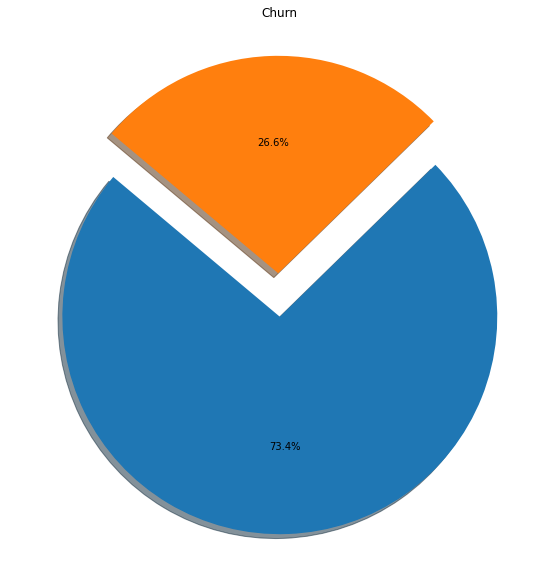

In [23]:
EDA_target(df, target)

## IDV

### IDV Objective

+--------+----------+
|        |   gender |
|--------+----------|
| Male   |     3549 |
| Female |     3483 |
+--------+----------+


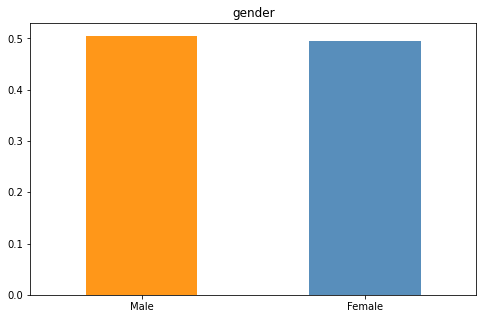

+----+-----------------+
|    |   SeniorCitizen |
|----+-----------------|
|  0 |            5890 |
|  1 |            1142 |
+----+-----------------+


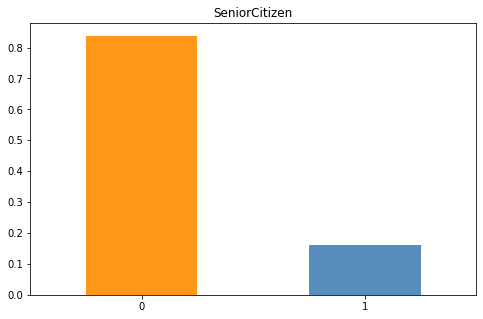

+-----+-----------+
|     |   Partner |
|-----+-----------|
| No  |      3639 |
| Yes |      3393 |
+-----+-----------+


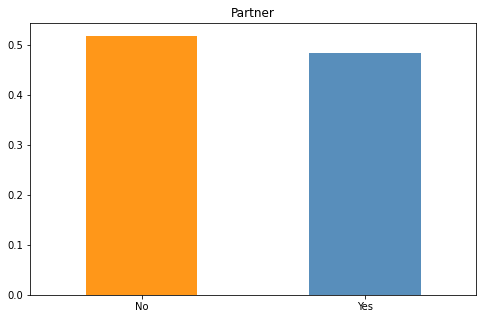

+-----+--------------+
|     |   Dependents |
|-----+--------------|
| No  |         4933 |
| Yes |         2099 |
+-----+--------------+


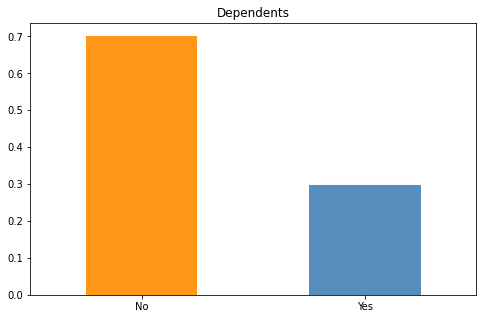

+----+----------+
|    |   tenure |
|----+----------|
|  1 |      613 |
| 72 |      362 |
|  2 |      238 |
|  3 |      200 |
|  4 |      176 |
| 71 |      170 |
|  5 |      133 |
|  7 |      131 |
|  8 |      123 |
| 70 |      119 |
|  9 |      119 |
| 12 |      117 |
| 10 |      116 |
|  6 |      110 |
| 13 |      109 |
| 68 |      100 |
| 11 |       99 |
| 15 |       99 |
| 67 |       98 |
| 18 |       97 |
| 69 |       95 |
| 24 |       94 |
| 22 |       90 |
| 66 |       89 |
| 35 |       88 |
| 17 |       87 |
| 23 |       85 |
| 16 |       80 |
| 64 |       80 |
| 56 |       80 |
| 52 |       80 |
| 26 |       79 |
| 25 |       79 |
| 61 |       76 |
| 14 |       76 |
| 65 |       76 |
| 60 |       76 |
| 46 |       74 |
| 19 |       73 |
| 29 |       72 |
| 27 |       72 |
| 30 |       72 |
| 63 |       72 |
| 20 |       71 |
| 53 |       70 |
| 62 |       70 |
| 41 |       70 |
| 32 |       69 |
| 50 |       68 |
| 47 |       68 |
| 51 |       68 |
| 54 |       68 |
| 58 |    

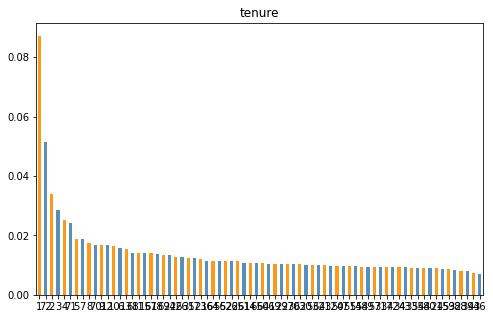

+-----+----------------+
|     |   PhoneService |
|-----+----------------|
| Yes |           6352 |
| No  |            680 |
+-----+----------------+


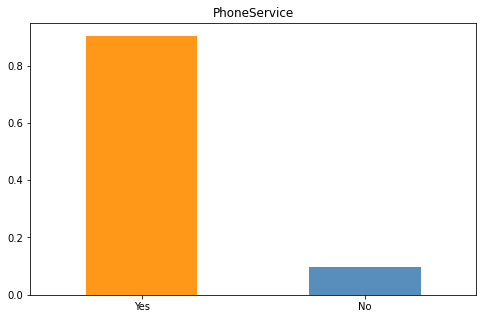

+------------------+-----------------+
|                  |   MultipleLines |
|------------------+-----------------|
| No               |            3385 |
| Yes              |            2967 |
| No phone service |             680 |
+------------------+-----------------+


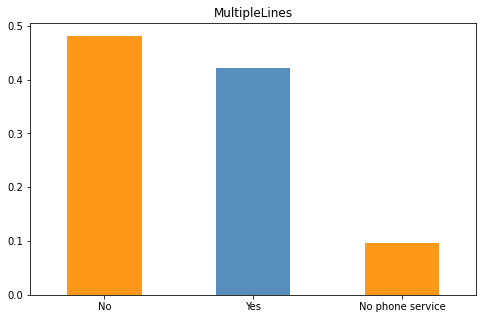

+-------------+-------------------+
|             |   InternetService |
|-------------+-------------------|
| Fiber optic |              3096 |
| DSL         |              2416 |
| No          |              1520 |
+-------------+-------------------+


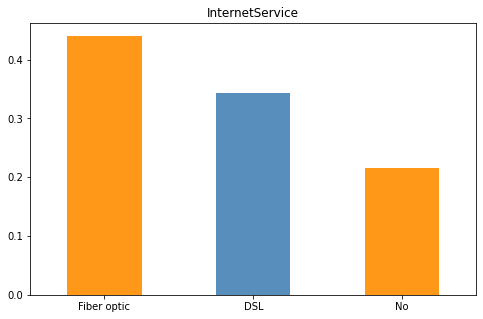

+---------------------+------------------+
|                     |   OnlineSecurity |
|---------------------+------------------|
| No                  |             3497 |
| Yes                 |             2015 |
| No internet service |             1520 |
+---------------------+------------------+


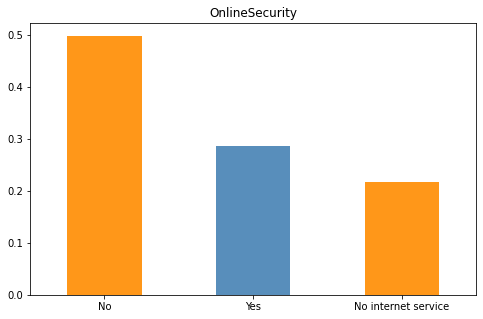

+---------------------+----------------+
|                     |   OnlineBackup |
|---------------------+----------------|
| No                  |           3087 |
| Yes                 |           2425 |
| No internet service |           1520 |
+---------------------+----------------+


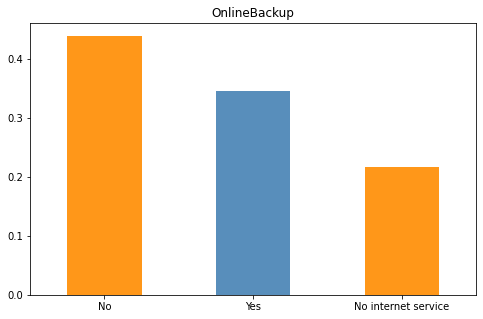

+---------------------+--------------------+
|                     |   DeviceProtection |
|---------------------+--------------------|
| No                  |               3094 |
| Yes                 |               2418 |
| No internet service |               1520 |
+---------------------+--------------------+


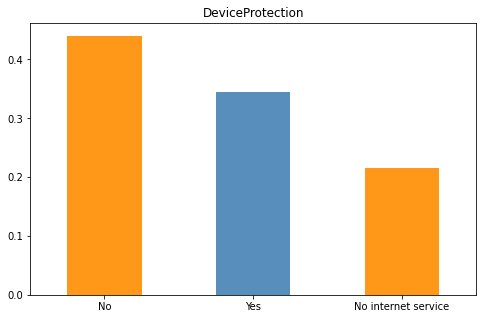

+---------------------+---------------+
|                     |   TechSupport |
|---------------------+---------------|
| No                  |          3472 |
| Yes                 |          2040 |
| No internet service |          1520 |
+---------------------+---------------+


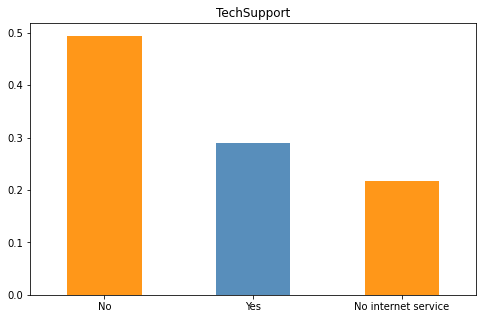

+---------------------+---------------+
|                     |   StreamingTV |
|---------------------+---------------|
| No                  |          2809 |
| Yes                 |          2703 |
| No internet service |          1520 |
+---------------------+---------------+


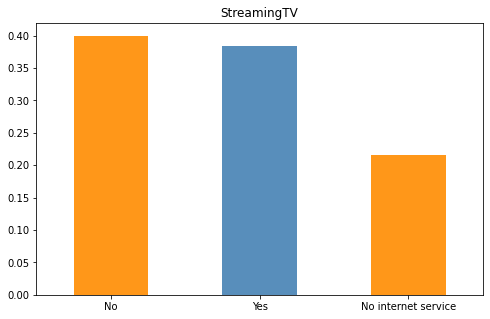

+---------------------+-------------------+
|                     |   StreamingMovies |
|---------------------+-------------------|
| No                  |              2781 |
| Yes                 |              2731 |
| No internet service |              1520 |
+---------------------+-------------------+


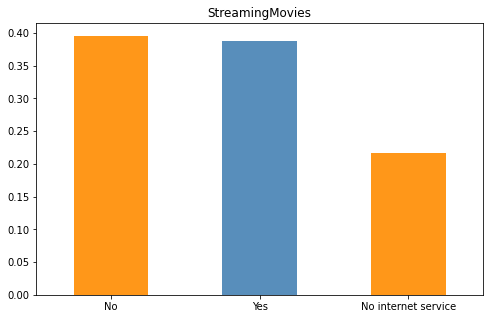

+----------------+------------+
|                |   Contract |
|----------------+------------|
| Month-to-month |       3875 |
| Two year       |       1685 |
| One year       |       1472 |
+----------------+------------+


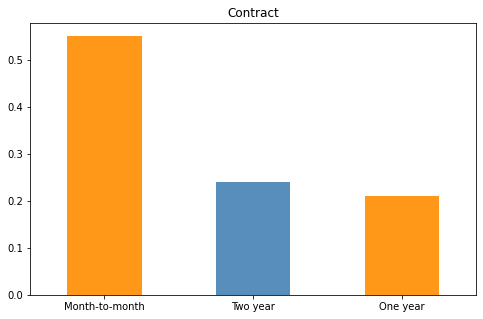

+-----+--------------------+
|     |   PaperlessBilling |
|-----+--------------------|
| Yes |               4168 |
| No  |               2864 |
+-----+--------------------+


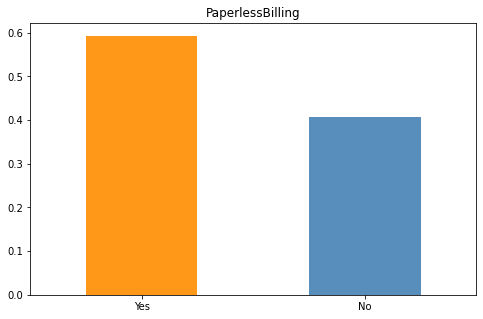

+---------------------------+-----------------+
|                           |   PaymentMethod |
|---------------------------+-----------------|
| Electronic check          |            2365 |
| Mailed check              |            1604 |
| Bank transfer (automatic) |            1542 |
| Credit card (automatic)   |            1521 |
+---------------------------+-----------------+


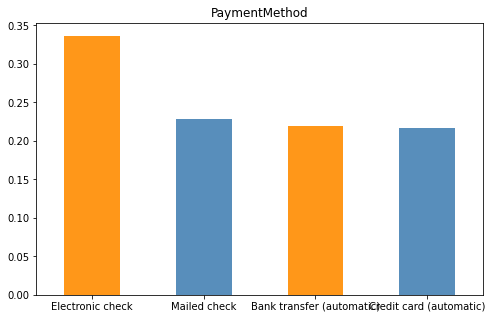

In [24]:
obj_EDA(df, Objcols)

### IDV Objective With DV

In [25]:
EDA_obj(df, Objcols, target)

Variable Name:  gender


Variable Name:  SeniorCitizen


Variable Name:  Partner


Variable Name:  Dependents


Variable Name:  tenure


Variable Name:  PhoneService


Variable Name:  MultipleLines


Variable Name:  InternetService


Variable Name:  OnlineSecurity


Variable Name:  OnlineBackup


Variable Name:  DeviceProtection


Variable Name:  TechSupport


Variable Name:  StreamingTV


Variable Name:  StreamingMovies


Variable Name:  Contract


Variable Name:  PaperlessBilling


Variable Name:  PaymentMethod


### IDV Numrical

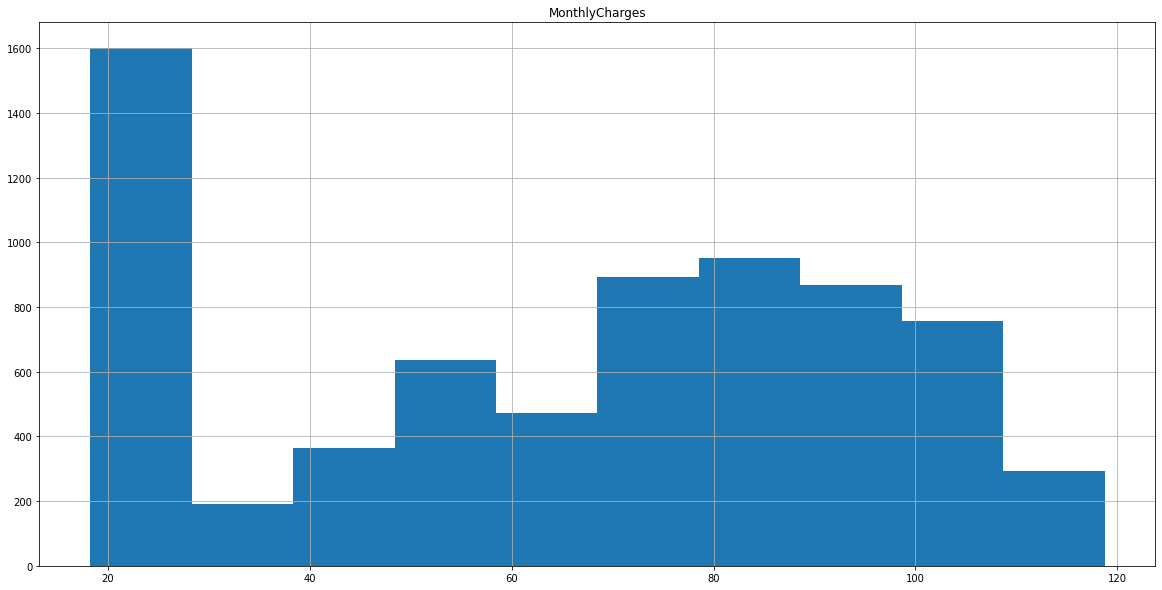

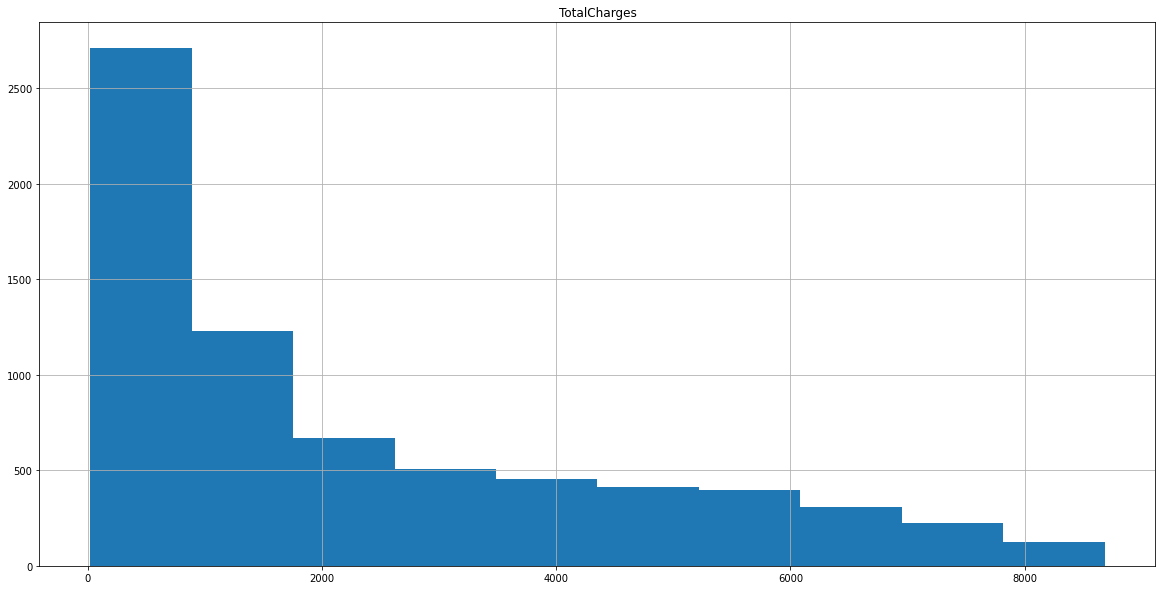

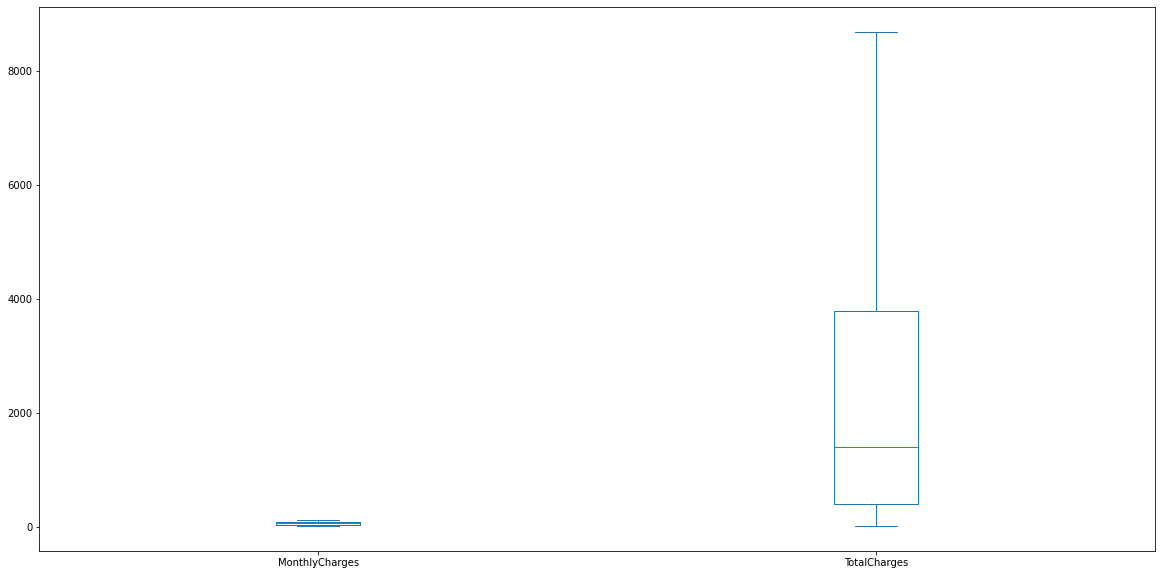

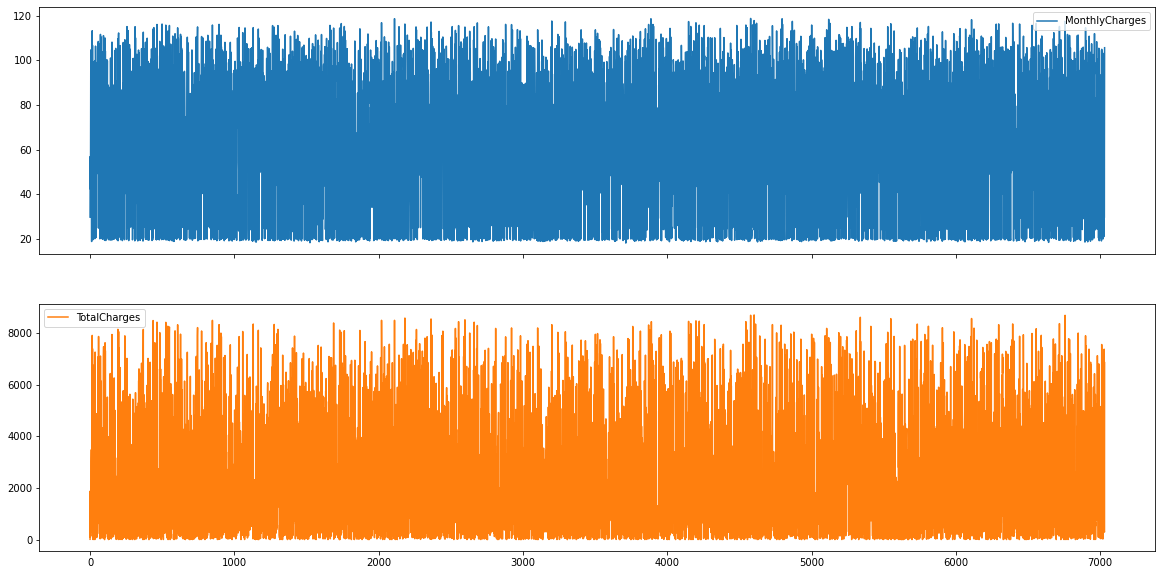

In [26]:
EDA_num(df, NUMcols)

### IDV Objective With DV

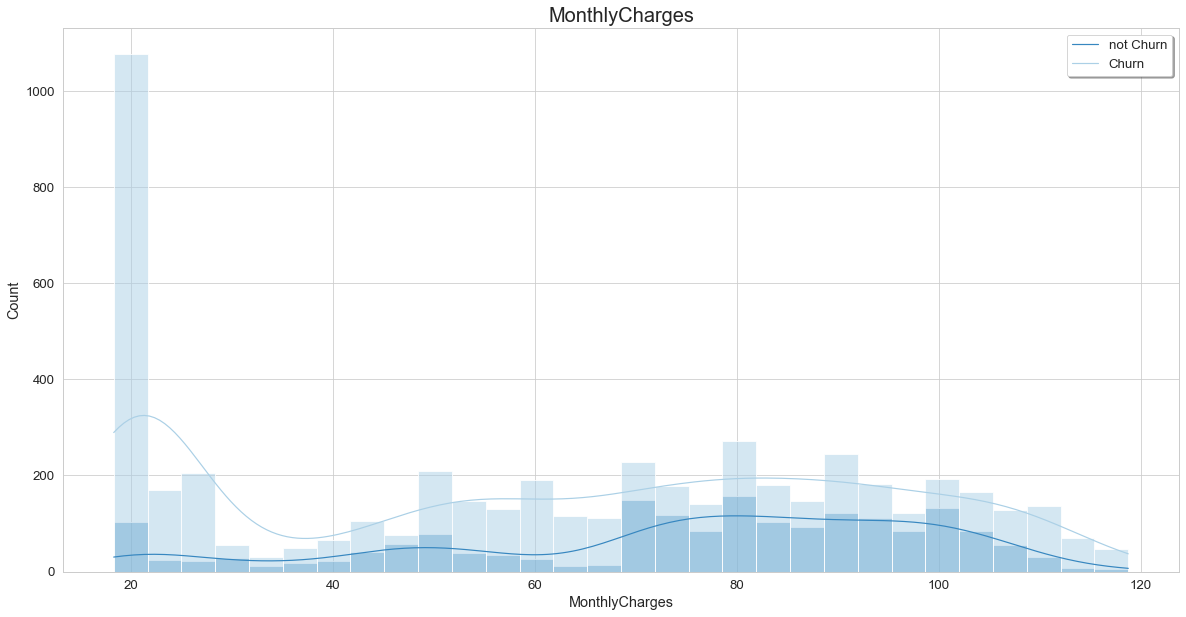

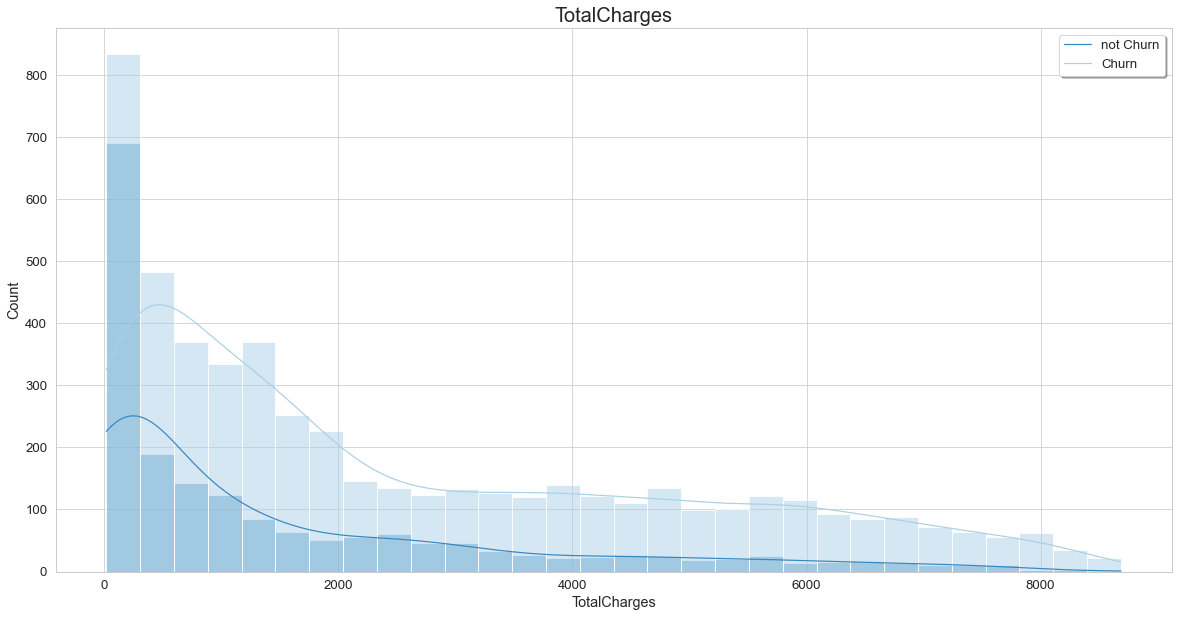

In [27]:
EDA_num_with_DV(df, NUMcols)

# 08. Data Transformation

Machine Learning algorithms perform better when numerical input variables are scaled to a standard range.
Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In [28]:
# StandardScaler
df = NumStandardScaler(df)


StandardScaler Applied On: MonthlyCharges

StandardScaler Applied On: TotalCharges


In [29]:
pd.DataFrame(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.162,-0.994,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.261,-0.174,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.364,-0.960,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.748,-0.195,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196,-0.940,Yes


As noted in the table above, standardisation was performed to the variables "MonthlyCharges," and "TotalCharges". each variable's value has previously been standardised.

# 09. Feature Selection

Feature Selection helps in finding the smallest set of features which results in

- Training a machine learning algorithm faster.
- Reducing the complexity of a model and making it easier to interpret.
- Building a sensible model with better prediction power.
- Reducing over-fitting by selecting the right set of features.

## Wrapper "Forward", "Backward" 

In [30]:
df, fs = Feature_selection_forward(df, target)

All the Num Variables: ['MonthlyCharges', 'TotalCharges', 'Churn']

All the obj Variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s finished

[2022-06-23 06:42:00] Features: 1/2 -- score: 0.6798222222222222[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Most Variables Can Effect The Target Variables:
 ('MonthlyCharges', 'TotalCharges')

With Highest Score:
 0.7591111111111111
All the Num Variables Selected: ['MonthlyCharges', 'TotalCharges']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished

[2022-06-23 06:42:01] Features: 2/2 -- score: 0.7591111111111111

As we can see In forward selection, it starts with a null model and then starts fitting the model with each individual numerical feature one at a time and selects the feature with the minimum p-value. then it fits a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again it selects the feature with the minimum p-value. then it fits a model with three features by trying combinations of two previously selected features with other remaining features. It repeats this process until it has a set of selected features with a p-value of individual features less than the significance level.

In [31]:
pd.DataFrame(fs)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.6737777777777778, 0.6808888888888889, 0.6737777777777778, 0.6755555555555556, 0.6951111111111111]",0.680,"(MonthlyCharges,)",0.010,0.008,0.004
2,"(0, 1)","[0.76, 0.7706666666666667, 0.7457777777777778, 0.7493333333333333, 0.7697777777777778]",0.759,"(MonthlyCharges, TotalCharges)",0.013,0.010,0.005


In [32]:
pd.DataFrame(df.head())

,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.162,-0.994,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,-0.261,-0.174,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,-0.364,-0.960,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,-0.748,-0.195,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,0.196,-0.940,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


The (MonthlyCharges, TotalCharges) variables, which has the highest average score and has no other numerical variables, is shown to have the highest average score in the table above that displays the average score for each step in the forward selection.
Therefore, out of all the numerical features, the model will now just choose the (MonthlyCharges, TotalCharges) variables.

# 10. Feature Engineering 

This approach is very simple and it involves converting each value in a column to a number. 
As well as, it requires the category column to be of ‘category’ datatype. 

In [33]:
df = df.apply(lambda x: AllObjLabelEncoder(x))


LableEncoding Applied On: gender

LableEncoding Applied On: SeniorCitizen

LableEncoding Applied On: Partner

LableEncoding Applied On: Dependents

LableEncoding Applied On: tenure

LableEncoding Applied On: PhoneService

LableEncoding Applied On: MultipleLines

LableEncoding Applied On: InternetService

LableEncoding Applied On: OnlineSecurity

LableEncoding Applied On: OnlineBackup

LableEncoding Applied On: DeviceProtection

LableEncoding Applied On: TechSupport

LableEncoding Applied On: StreamingTV

LableEncoding Applied On: StreamingMovies

LableEncoding Applied On: Contract

LableEncoding Applied On: PaperlessBilling

LableEncoding Applied On: PaymentMethod

LableEncoding Applied On: Churn


In [34]:
pd.DataFrame(df.head())

,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.162,-0.994,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,-0.261,-0.174,1,0,0,0,27,1,0,0,2,0,2,0,0,0,1,0,3,0
2,-0.364,-0.960,1,0,0,0,11,1,0,0,2,2,0,0,0,0,0,1,3,1
3,-0.748,-0.195,1,0,0,0,39,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0.196,-0.940,0,0,0,0,11,1,0,1,0,0,0,0,0,0,0,1,2,1


# 11. Statistics 

## Correlation between IDV and DV

In [35]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,Churn
0,Churn,1.000
1,MonthlyCharges,0.193
2,PaperlessBilling,0.191
3,SeniorCitizen,0.151
4,PaymentMethod,0.108
5,MultipleLines,0.038
6,PhoneService,0.012
7,gender,-0.009
8,StreamingTV,-0.036
9,StreamingMovies,-0.039


## Correlation between all the Variables

In [36]:
pd.DataFrame(df.corr())

,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
MonthlyCharges,1.000,0.651,-0.014,0.220,0.098,-0.112,0.197,0.248,0.434,-0.322,-0.054,0.120,0.164,-0.008,0.337,0.336,-0.073,0.352,-0.192,0.193
TotalCharges,0.651,1.000,0.000,0.102,0.319,0.065,0.613,0.113,0.453,-0.176,0.254,0.376,0.389,0.277,0.392,0.398,0.450,0.158,-0.331,-0.199
gender,-0.014,0.000,1.000,-0.002,-0.001,0.010,0.001,-0.008,-0.007,-0.002,-0.015,-0.012,0.001,-0.007,-0.006,-0.009,0.000,-0.012,0.017,-0.009
SeniorCitizen,0.220,0.102,-0.002,1.000,0.017,-0.211,0.012,0.008,0.146,-0.032,-0.128,-0.013,-0.021,-0.151,0.031,0.047,-0.142,0.156,-0.038,0.151
Partner,0.098,0.319,-0.001,0.017,1.000,0.452,0.289,0.018,0.143,0.001,0.151,0.153,0.166,0.126,0.137,0.130,0.294,-0.014,-0.156,-0.150
Dependents,-0.112,0.065,0.010,-0.211,0.452,1.000,0.116,-0.001,-0.025,0.044,0.151,0.090,0.080,0.133,0.046,0.022,0.241,-0.110,-0.042,-0.163
tenure,0.197,0.613,0.001,0.012,0.289,0.116,1.000,0.006,0.251,-0.032,0.249,0.277,0.277,0.243,0.223,0.225,0.516,0.006,-0.272,-0.257
PhoneService,0.248,0.113,-0.008,0.008,0.018,-0.001,0.006,1.000,-0.021,0.387,-0.014,0.024,0.005,-0.018,0.056,0.043,0.003,0.017,-0.005,0.012
MultipleLines,0.434,0.453,-0.007,0.146,0.143,-0.025,0.251,-0.021,1.000,-0.109,0.007,0.117,0.123,0.011,0.175,0.182,0.111,0.165,-0.177,0.038
InternetService,-0.322,-0.176,-0.002,-0.032,0.001,0.044,-0.032,0.387,-0.109,1.000,-0.028,0.037,0.046,-0.026,0.108,0.098,0.100,-0.138,0.085,-0.047


In [37]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
MonthlyCharges,1.000000,0.651065,-0.013779,0.219874,0.097825,-0.112343,0.196809,0.248033,0.433905,-0.322173,-0.053576,0.119943,0.163984,-0.008237,0.337156,0.335761,-0.072739,0.351930,-0.192500,0.192858
TotalCharges,0.651065,1.000000,0.000048,0.102411,0.319072,0.064653,0.612974,0.113008,0.453202,-0.175691,0.254473,0.375556,0.389066,0.276890,0.392472,0.398088,0.450306,0.157830,-0.330594,-0.199484
gender,-0.013779,0.000048,1.000000,-0.001819,-0.001379,0.010349,0.001158,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.008545
SeniorCitizen,0.219874,0.102411,-0.001819,1.000000,0.016957,-0.210550,0.011869,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.150541
Partner,0.097825,0.319072,-0.001379,0.016957,1.000000,0.452269,0.289470,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,-0.149982
Dependents,-0.112343,0.064653,0.010349,-0.210550,0.452269,1.000000,0.116163,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.163128
tenure,0.196809,0.612974,0.001158,0.011869,0.289470,0.116163,1.000000,0.005848,0.250746,-0.032240,0.248915,0.276559,0.276772,0.242846,0.222721,0.224575,0.516219,0.006058,-0.271781,-0.257041
PhoneService,0.248033,0.113008,-0.007515,0.008392,0.018397,-0.001078,0.005848,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.011691
MultipleLines,0.433905,0.453202,-0.006908,0.146287,0.142717,-0.024975,0.250746,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.038043
InternetService,-0.322173,-0.175691,-0.002236,-0.032160,0.000513,0.044030,-0.032240,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.047097


## Factor Analysis

## Cluster Analysis

# 12. Resampling Data

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance the minority class. In this section will develop an intuition for the SMOTE approaches by applying it to an imbalanced binary classification problem.
- Note the model will evaluate using the ROC area under curve (AUC) metric

In [38]:
# Define X, y
X = df.drop(target, axis=1)
y = df[target]

X, y = resampling_by_smoth(X, y)


Original dataset shape Counter({0: 5163, 1: 1869})
SMOTH Resample dataset shape Counter({0: 5163, 1: 5163})
SMOTH Mean ROC AUC:  0.7792728000104686

Original dataset shape Counter({0: 5163, 1: 1869})
SMOTH SVM Resample dataset shape Counter({0: 5163, 1: 5163})
SMOTH SVM Mean ROC AUC:  0.7917965544356104

Original dataset shape Counter({0: 5163, 1: 1869})
Standerd SMOTH pipeline Resample dataset shape Counter({0: 5163, 1: 5163})
Standerd SMOTH pipeline Mean ROC AUC:  0.7788396526685911

Original dataset shape Counter({0: 5163, 1: 1869})
K neighbors SMOTH pipeline Resample dataset shape Counter({0: 5163, 1: 5163})
K neighbors SMOTH pipeline Mean ROC AUC:  0.7852860623687365

	The Highest ROC Score is:  0.7917965544356104


As it provides, the SMOTE SVM is showing the highest ROC, so it the SMOTE approach select is SMOTE SVM.

In [39]:
print('\nOriginal dataset shape', Counter(y))


Original dataset shape Counter({0: 5163, 1: 5163})


# 13. Data Splitting 

Based on the dataset size, it will split the dataset into 80% for traning and 20% for testing 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(8260, 19)
(8260,)
(2066, 19)
(2066,)


# 14. Machine Learning Models 

## Build the Models using CPU

In [41]:
# Random Forest Classifier
rf_m_1_cpu = RandomForestClassifier().fit(X_train, y_train)
print ('Random Forest Classifier Built')

# Gradient Boosting Classifier
gb_m_1_cpu = GradientBoostingClassifier().fit(X_train, y_train)
print ('Gradient Boosting Classifier Built')

# Histogram-based Gradient Boosting Classification Tree
hgb_m_1_cpu = HistGradientBoostingClassifier().fit(X_train, y_train)
print ('Histogram-based Gradient Boosting Classification Tree Built')

# AdaBoost Classifier
ad_m_1_cpu = AdaBoostClassifier().fit(X_train, y_train)
print ('AdaBoost Classifier Built')

# Extra Trees Classifier
et_m_1_cpu = ExtraTreesClassifier().fit(X_train, y_train)
print ('Extra Trees Classifier Built')

# K Neighbors Classifier
knn_m_1_cpu = KNeighborsClassifier().fit(X_train, y_train)
print ('K Neighbors Classifier Classifiers Built')

# Naive Bayes Classifiers
nb_m_1_cpu = GaussianNB().fit(X_train, y_train)
print ('Naive Bayes Classifiers Built')

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_cpu = BernoulliNB().fit(X_train, y_train)
print ('Naive Bayes Classifier for Multivariate Bernoulli Built')

# Decision Tree Classifier
dt_m_1_cpu = DecisionTreeClassifier().fit(X_train, y_train)
print ('Decision Tree Classifier Built')

# Logistic Regression Classifier
lg_m_1_cpu = LogisticRegression().fit(X_train, y_train)
print ('Logistic Regression Classifier Built')

# Logistic Regression CV Classifier
lgcv_m_1_cpu = LogisticRegressionCV().fit(X_train, y_train)
print ('Logistic Regression CV Classifier Built')

# Stochastic Gradient Descent Classifier
sgdc_m_1_cpu = SGDClassifier().fit(X_train, y_train)
print ('Stochastic Gradient Descent Classifier Built')

# Linear Perceptron Classifier
lpc_m_1_cpu = Perceptron().fit(X_train, y_train)
print ('Linear Perceptron Classifier Built')

# XGBoost Classifiers
xgb_m_1_cpu = XGBClassifier().fit(X_train, y_train)
print ('XGBoost Classifier Built')

# Support Vector Machines Classifiers
svm_m_1_cpu = SVC().fit(X_train, y_train)
print ('Support Vector Machines Classifiers Built')

# Linear Support Vector Classification
lsvm_m_1_cpu = LinearSVC().fit(X_train, y_train)
print ('Linear Support Vector Classification Built')

# Multilayer Perceptron Classifier
mlp_m_1_cpu = MLPClassifier().fit(X_train, y_train)
print ('Multilayer Perceptron Classifier Built')

Random Forest Classifier Built
Gradient Boosting Classifier Built
Histogram-based Gradient Boosting Classification Tree Built
AdaBoost Classifier Built
Extra Trees Classifier Built
K Neighbors Classifier Classifiers Built
Naive Bayes Classifiers Built
Naive Bayes Classifier for Multivariate Bernoulli Built
Decision Tree Classifier Built
Logistic Regression Classifier Built
Logistic Regression CV Classifier Built
Stochastic Gradient Descent Classifier Built
Linear Perceptron Classifier Built
XGBoost Classifier Built
Support Vector Machines Classifiers Built
Linear Support Vector Classification Built
Multilayer Perceptron Classifier Built


## Predict y_test Using CPU

In [42]:
# Random Forest Classifier
rf_m_1_pred_vaild_cpu = rf_m_1_cpu.predict(X_test)

# Gradient Boosting Classifier
gb_m_1_pred_vaild_cpu = gb_m_1_cpu.predict(X_test)

# Histogram-based Gradient Boosting Classification Tree
hgb_m_1_pred_vaild_cpu = hgb_m_1_cpu.predict(X_test)

# AdaBoost Classifier
ad_m_1_pred_vaild_cpu = ad_m_1_cpu.predict(X_test)

# Extra Trees Classifier
et_m_1_pred_vaild_cpu = et_m_1_cpu.predict(X_test)

# K Neighbors Classifier
knn_m_1_pred_vaild_cpu = knn_m_1_cpu.predict(X_test)

# Naive Bayes Classifiers
nb_m_1_pred_vaild_cpu = nb_m_1_cpu.predict(X_test)

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_pred_vaild_cpu = bnb_m_1_cpu.predict(X_test)

# Decision Tree Classifier
dt_m_1_pred_vaild_cpu = dt_m_1_cpu.predict(X_test)

# Logistic Regression Classifier
lg_m_1_pred_vaild_cpu = lg_m_1_cpu.predict(X_test)

# Logistic Regression CV Classifier
lgcv_m_1_pred_vaild_cpu =  lgcv_m_1_cpu.predict(X_test)

# Stochastic Gradient Descent Classifier
sgdc_m_1_pred_vaild_cpu =  sgdc_m_1_cpu.predict(X_test)

# Linear Perceptron Classifier
lpc_m_1_pred_vaild_cpu =  lpc_m_1_cpu.predict(X_test)

# XGBoost Classifiers
xgb_m_1_pred_vaild_cpu = xgb_m_1_cpu.predict(X_test)

# Support Vector Machines Classifiers
svm_m_1_pred_vaild_cpu = svm_m_1_cpu.predict(X_test)

# Linear Support Vector Classification
lsvm_m_1_pred_vaild_cpu = lsvm_m_1_cpu.predict(X_test)

# Multilayer Perceptron Classifier
mlp_m_1_pred_vaild_cpu = mlp_m_1_cpu.predict(X_test)


## Evaluate the Models CPU

### Accuracy Score

In [43]:
# Random Forest Classifier
Valid_accuracy_rf_m_1_cpu = accuracy_score(y_test, rf_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_m_1_cpu = accuracy_score(y_test, gb_m_1_pred_vaild_cpu)

# Histogram-based Gradient Boosting Classification Tree
Valid_accuracy_hgb_m_1_cpu = accuracy_score(y_test, hgb_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_m_1_cpu = accuracy_score(y_test, ad_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_m_1_cpu = accuracy_score(y_test, et_m_1_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_m_1_cpu = accuracy_score(y_test, knn_m_1_pred_vaild_cpu)

# Naive Bayes Classifiers
Valid_accuracy_nb_m_1_cpu = accuracy_score(y_test, nb_m_1_pred_vaild_cpu)

# Naive Bayes Classifier for Multivariate Bernoulli
Valid_accuracy_bnb_m_1_cpu = accuracy_score(y_test, bnb_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_m_1_cpu = accuracy_score(y_test, dt_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_m_1_cpu = accuracy_score(y_test, lg_m_1_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_m_1_cpu = accuracy_score(y_test, lgcv_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_m_1_cpu = accuracy_score(y_test, sgdc_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_m_1_cpu = accuracy_score(y_test, lpc_m_1_pred_vaild_cpu)

# XGBoost Classifiers
Valid_accuracy_xgb_m_1_cpu = accuracy_score(y_test, xgb_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_m_1_cpu = accuracy_score(y_test, svm_m_1_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_m_1_cpu = accuracy_score(y_test, lsvm_m_1_pred_vaild_cpu)

# Multilayer Perceptron Classifier
Valid_accuracy_mlp_m_1_cpu = accuracy_score(y_test, mlp_m_1_pred_vaild_cpu)

cpu_ml_m_1_valid_compare = pd.DataFrame({"Standered CPU Models": [
                                "Random Forest Classifier", 
                                "Gradient Boosting Classifier",
                                "Histogram-based Gradient Boosting Classification Tree",
                                "AdaBoost Classifier",
                                "Extra Trees Classifier",
                                "K Neighbors Classifier",
                                "Naive Bayes Classifiers",
                                "Naive Bayes Classifier for Multivariate Bernoulli",
                                "Decision Tree Classifier",
                                "Logistic Regression Classifier",
                                "Logistic Regression CV Classifier",
                                "Stochastic Gradient Descent Classifier",
                                "Linear Perceptron Classifier",
                                "XGBoost Classifiers",
                                "Support Vector Machines Classifiers",
                                "Linear Support Vector Classification",
                                "Multilayer Perceptron Classifier"
                                ],

                "Standered CPU Models Accuracy": [
                                Valid_accuracy_rf_m_1_cpu, 
                                Valid_accuracy_gb_m_1_cpu,
                                Valid_accuracy_hgb_m_1_cpu,
                                Valid_accuracy_ad_m_1_cpu,
                                Valid_accuracy_et_m_1_cpu,
                                Valid_accuracy_knn_m_1_cpu,
                                Valid_accuracy_nb_m_1_cpu,
                                Valid_accuracy_bnb_m_1_cpu,
                                Valid_accuracy_dt_m_1_cpu,
                                Valid_accuracy_lg_m_1_cpu,
                                Valid_accuracy_lgcv_m_1_cpu,
                                Valid_accuracy_sgdc_m_1_cpu,
                                Valid_accuracy_lpc_m_1_cpu,
                                Valid_accuracy_xgb_m_1_cpu,
                                Valid_accuracy_svm_m_1_cpu,
                                Valid_accuracy_lsvm_m_1_cpu,
                                Valid_accuracy_mlp_m_1_cpu
                                ],
                        })  
                                
print(tabulate(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))
#cpu_ml_m_1_valid_compare = cpu_ml_m_1_valid_compare.sort_values(by="Accuracy", ascending=True) #To sort all the result 
fig = px.bar(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending=True), x = "Standered CPU Models Accuracy", y = "Standered CPU Models", title = "CPU Model Machines Learning Validation Accuracy")
fig.show()

+----+-------------------------------------------------------+---------------------------------+
|    | Standered CPU Models                                  |   Standered CPU Models Accuracy |
|----+-------------------------------------------------------+---------------------------------|
|  4 | Extra Trees Classifier                                |                        0.845111 |
|  0 | Random Forest Classifier                              |                        0.844143 |
| 13 | XGBoost Classifiers                                   |                        0.831559 |
|  2 | Histogram-based Gradient Boosting Classification Tree |                        0.821394 |
|  1 | Gradient Boosting Classifier                          |                        0.809293 |
|  5 | K Neighbors Classifier                                |                        0.805905 |
|  3 | AdaBoost Classifier                                   |                        0.803969 |
| 16 | Multilayer Perceptron C

### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.860     0.824     0.841      1037
           1      0.829     0.865     0.847      1029

    accuracy                          0.844      2066
   macro avg      0.845     0.844     0.844      2066
weighted avg      0.845     0.844     0.844      2066



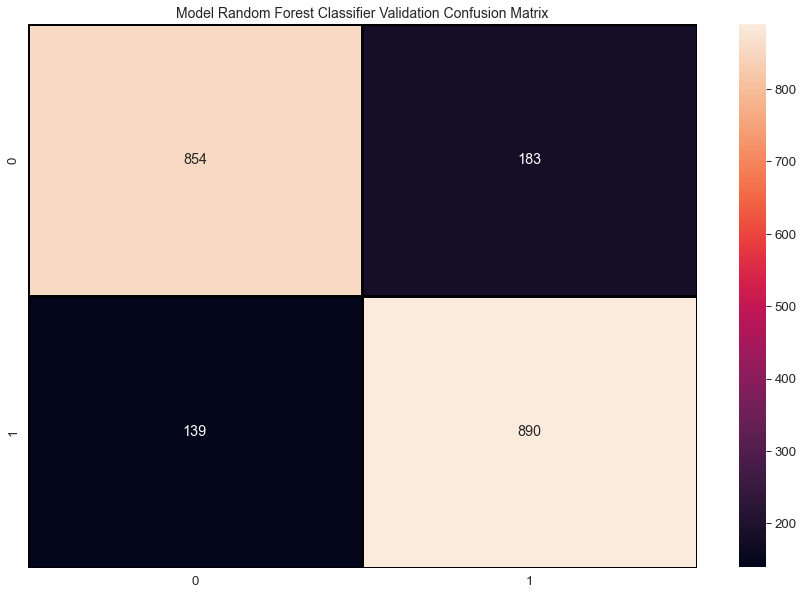

In [44]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_m_1_pred_vaild_cpu),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.841     0.765     0.801      1037
           1      0.783     0.854     0.817      1029

    accuracy                          0.809      2066
   macro avg      0.812     0.809     0.809      2066
weighted avg      0.812     0.809     0.809      2066



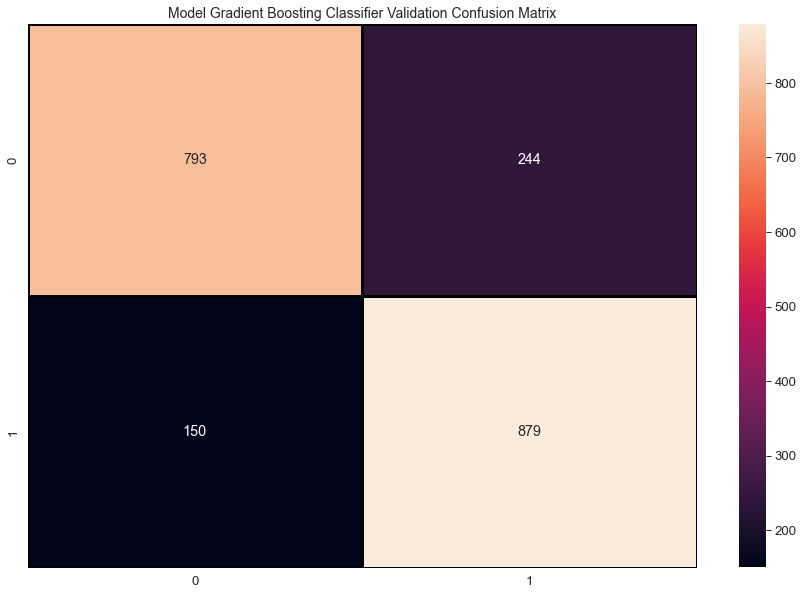

In [45]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Histogram-based Gradient Boosting Classification Tree

Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:
                precision    recall  f1-score   support

           0      0.843     0.792     0.817      1037
           1      0.802     0.851     0.826      1029

    accuracy                          0.821      2066
   macro avg      0.823     0.822     0.821      2066
weighted avg      0.823     0.821     0.821      2066



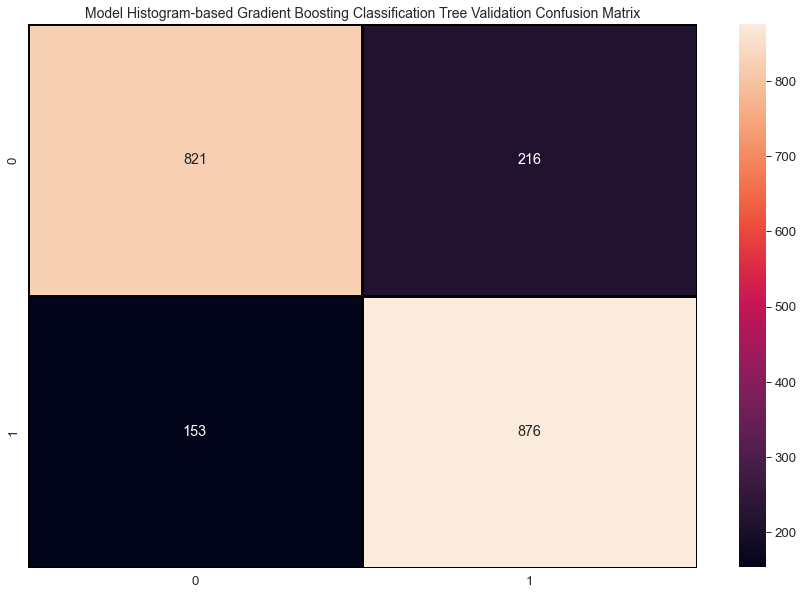

In [46]:
print('Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:\n ', classification_report(y_test, hgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, hgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Histogram-based Gradient Boosting Classification Tree Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.835     0.760     0.796      1037
           1      0.778     0.848     0.812      1029

    accuracy                          0.804      2066
   macro avg      0.806     0.804     0.804      2066
weighted avg      0.807     0.804     0.804      2066



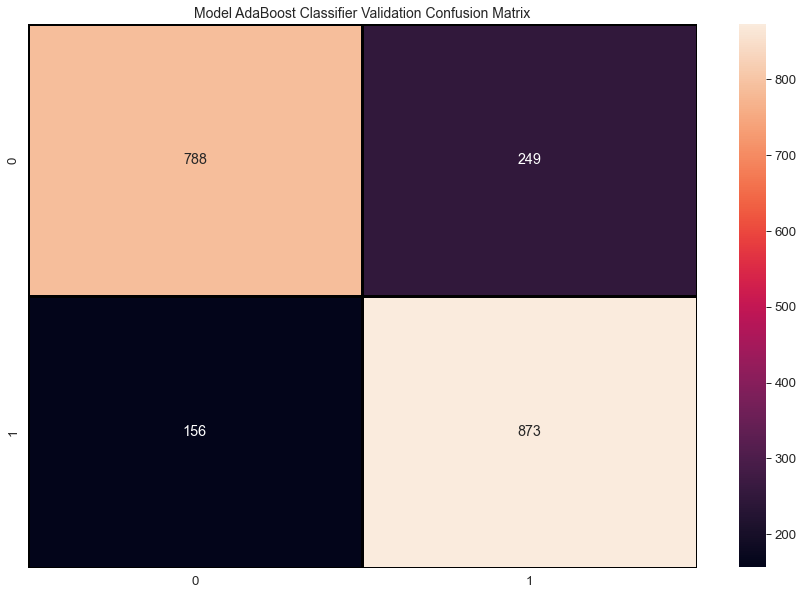

In [47]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.848     0.843     0.845      1037
           1      0.843     0.847     0.845      1029

    accuracy                          0.845      2066
   macro avg      0.845     0.845     0.845      2066
weighted avg      0.845     0.845     0.845      2066



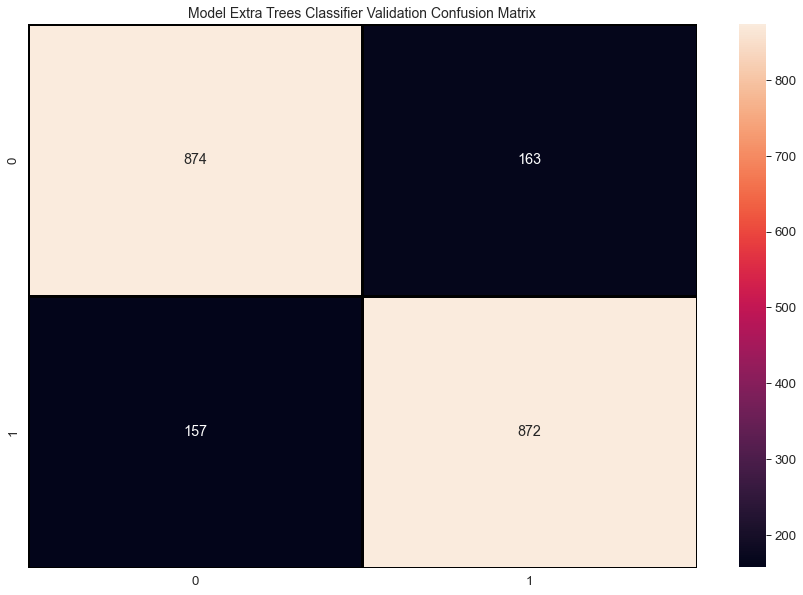

In [48]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.881     0.709     0.786      1037
           1      0.755     0.904     0.823      1029

    accuracy                          0.806      2066
   macro avg      0.818     0.806     0.804      2066
weighted avg      0.818     0.806     0.804      2066



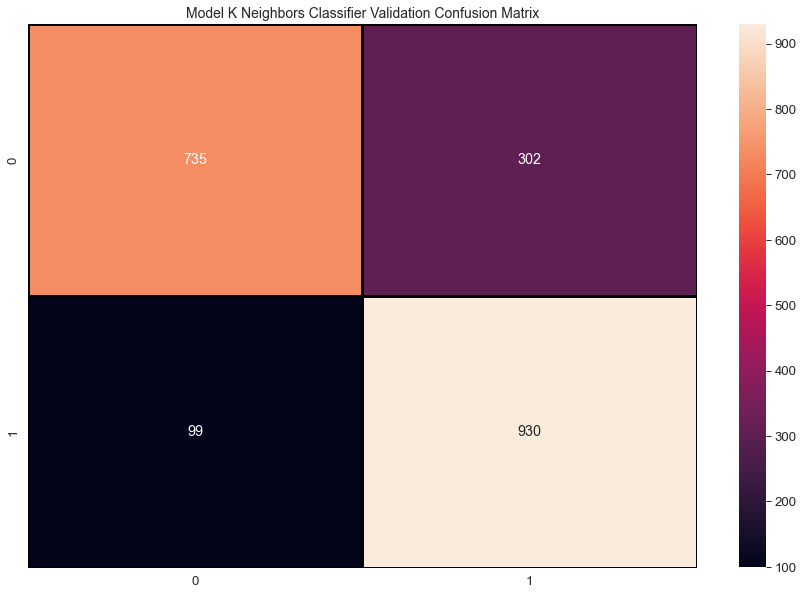

In [49]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier 

Model Naive Bayes Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.821     0.737     0.776      1037
           1      0.759     0.838     0.797      1029

    accuracy                          0.787      2066
   macro avg      0.790     0.787     0.787      2066
weighted avg      0.790     0.787     0.787      2066



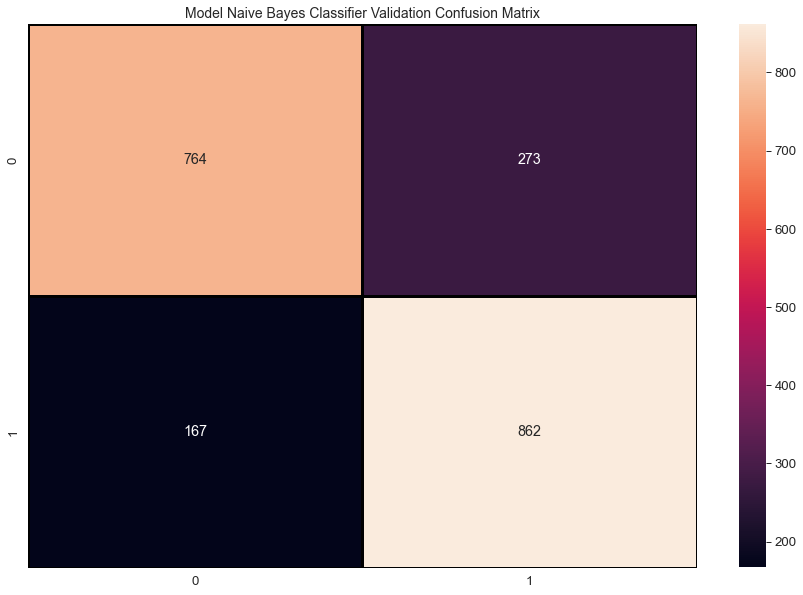

In [50]:
print('Model Naive Bayes Classifier Validation Classification Report:\n ', classification_report(y_test, nb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, nb_m_1_pred_vaild_cpu),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Naive Bayes Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier for Multivariate Bernoulli

Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:
                precision    recall  f1-score   support

           0      0.806     0.728     0.765      1037
           1      0.750     0.823     0.785      1029

    accuracy                          0.775      2066
   macro avg      0.778     0.776     0.775      2066
weighted avg      0.778     0.775     0.775      2066



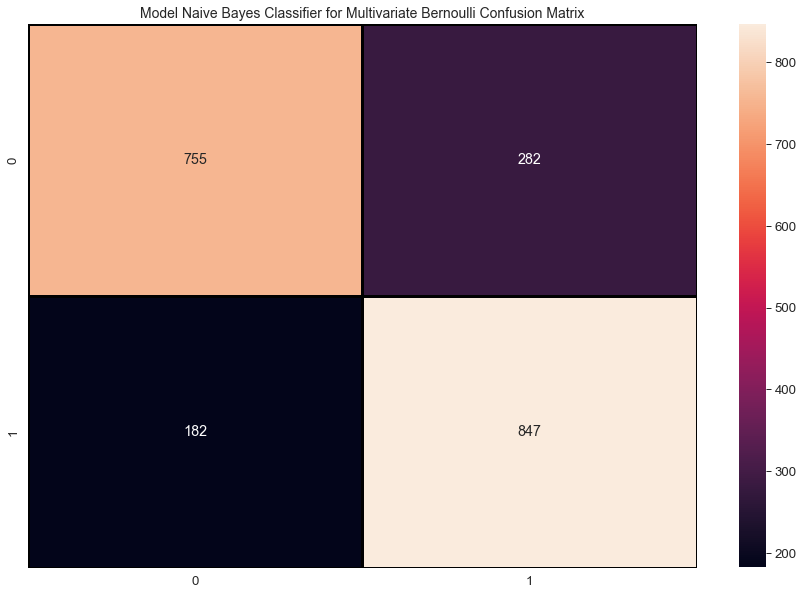

In [51]:
print('Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:\n ', classification_report(y_test, bnb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, bnb_m_1_pred_vaild_cpu),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Naive Bayes Classifier for Multivariate Bernoulli Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.802     0.787     0.795      1037
           1      0.789     0.805     0.797      1029

    accuracy                          0.796      2066
   macro avg      0.796     0.796     0.796      2066
weighted avg      0.796     0.796     0.796      2066



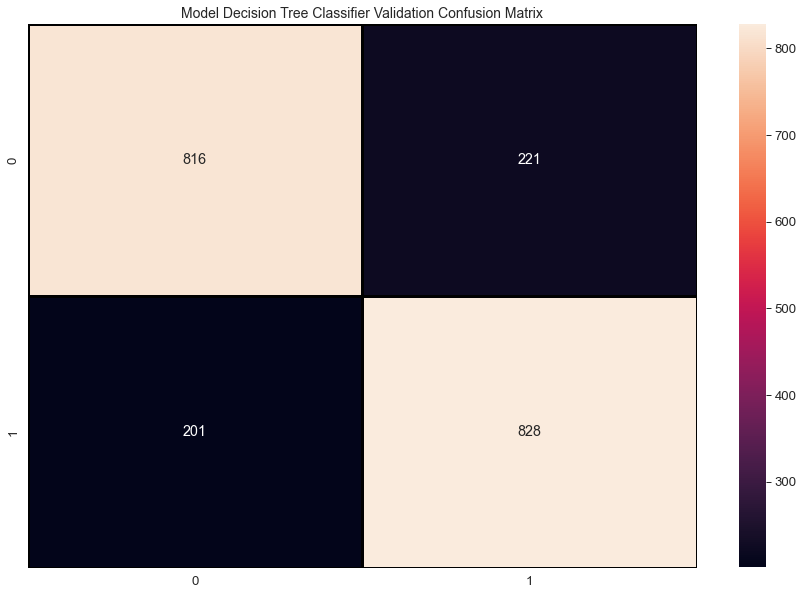

In [52]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.815     0.755     0.784      1037
           1      0.770     0.827     0.798      1029

    accuracy                          0.791      2066
   macro avg      0.792     0.791     0.791      2066
weighted avg      0.793     0.791     0.791      2066



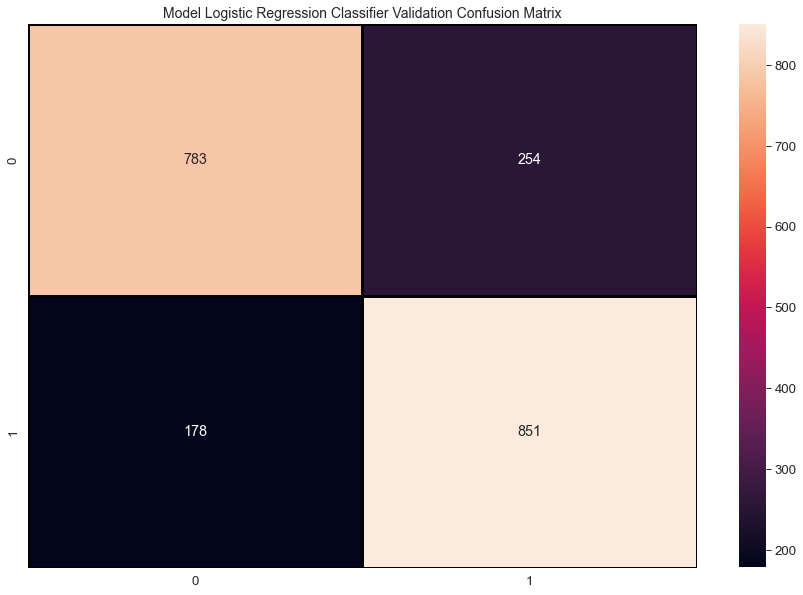

In [53]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.818     0.752     0.784      1037
           1      0.769     0.831     0.799      1029

    accuracy                          0.791      2066
   macro avg      0.793     0.792     0.791      2066
weighted avg      0.793     0.791     0.791      2066



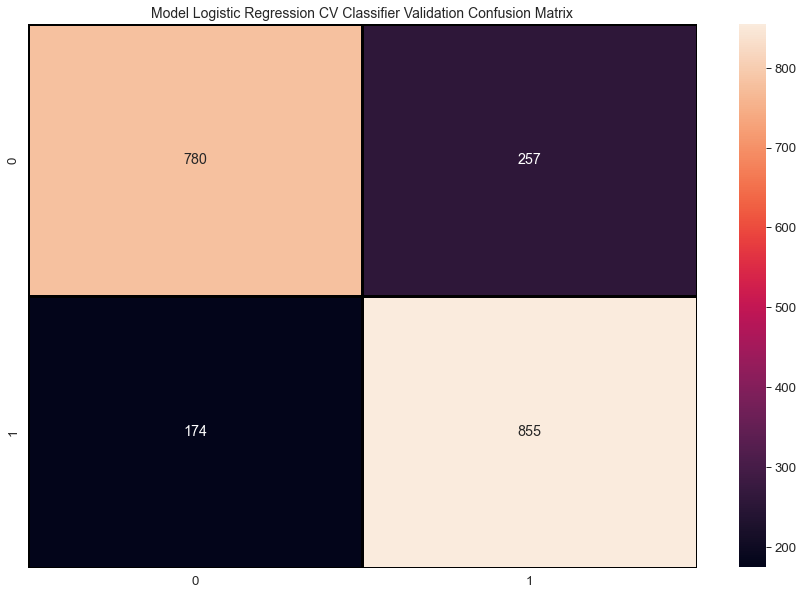

In [54]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.646     0.910     0.756      1037
           1      0.846     0.498     0.627      1029

    accuracy                          0.705      2066
   macro avg      0.746     0.704     0.691      2066
weighted avg      0.746     0.705     0.691      2066



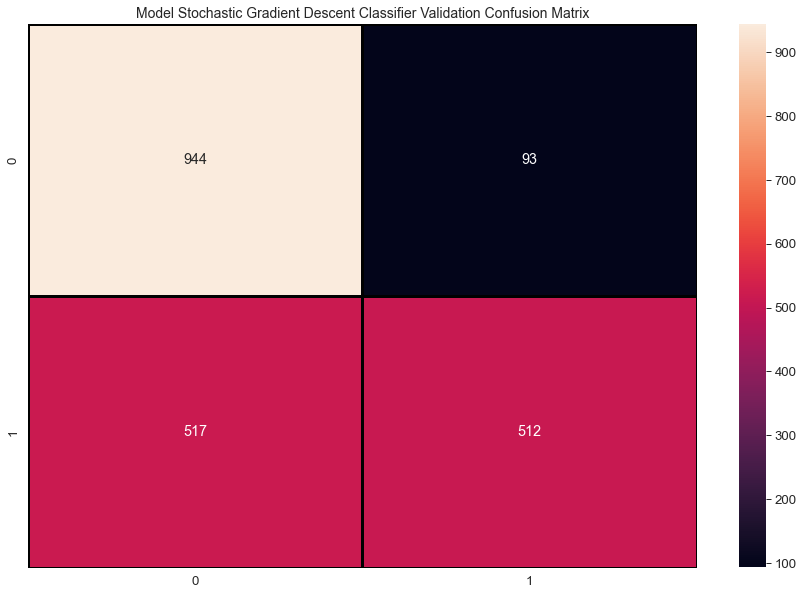

In [55]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.580     0.959     0.722      1037
           1      0.877     0.299     0.446      1029

    accuracy                          0.630      2066
   macro avg      0.729     0.629     0.584      2066
weighted avg      0.728     0.630     0.585      2066



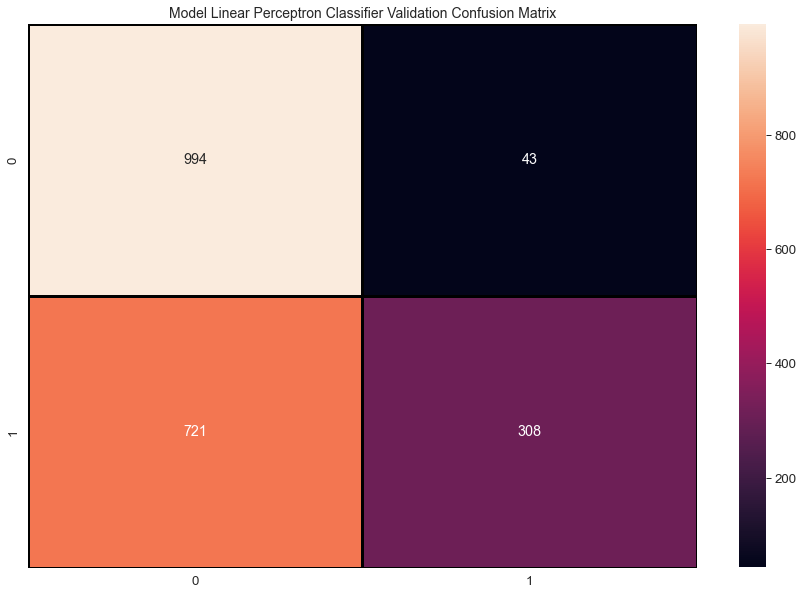

In [56]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### XGBoost Classifier

Model XGBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.852     0.804     0.827      1037
           1      0.813     0.859     0.836      1029

    accuracy                          0.832      2066
   macro avg      0.833     0.832     0.831      2066
weighted avg      0.833     0.832     0.831      2066



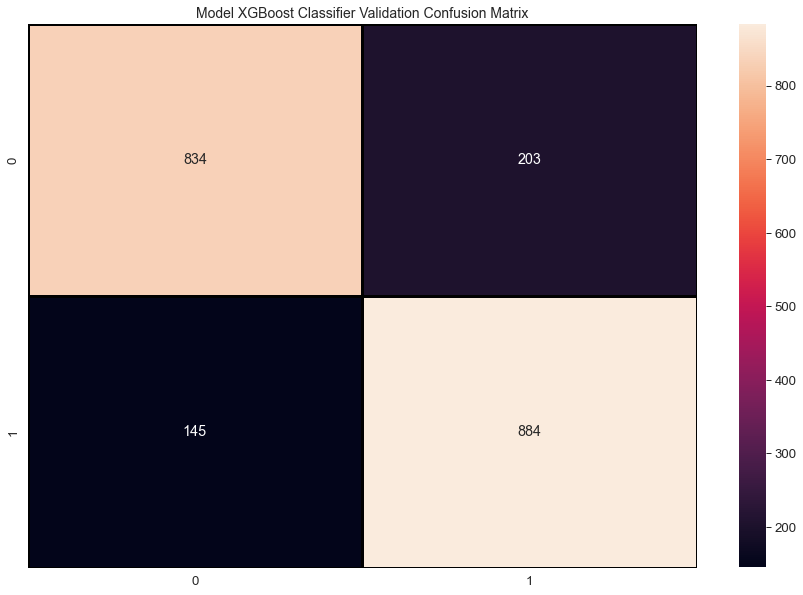

In [57]:
print('Model XGBoost Classifier Validation Classification Report:\n ', classification_report(y_test, xgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, xgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model XGBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.851     0.697     0.766      1037
           1      0.742     0.877     0.804      1029

    accuracy                          0.787      2066
   macro avg      0.796     0.787     0.785      2066
weighted avg      0.796     0.787     0.785      2066



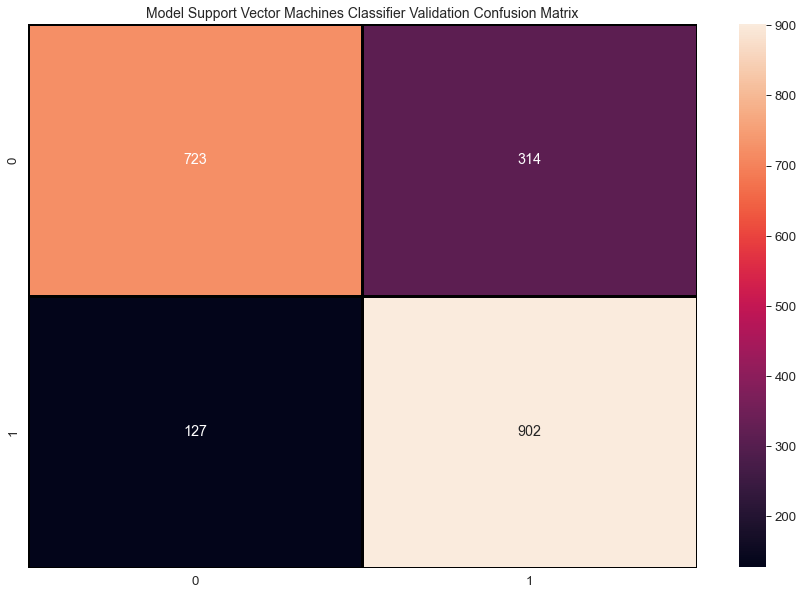

In [58]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      0.869     0.672     0.758      1037
           1      0.731     0.898     0.806      1029

    accuracy                          0.785      2066
   macro avg      0.800     0.785     0.782      2066
weighted avg      0.800     0.785     0.782      2066



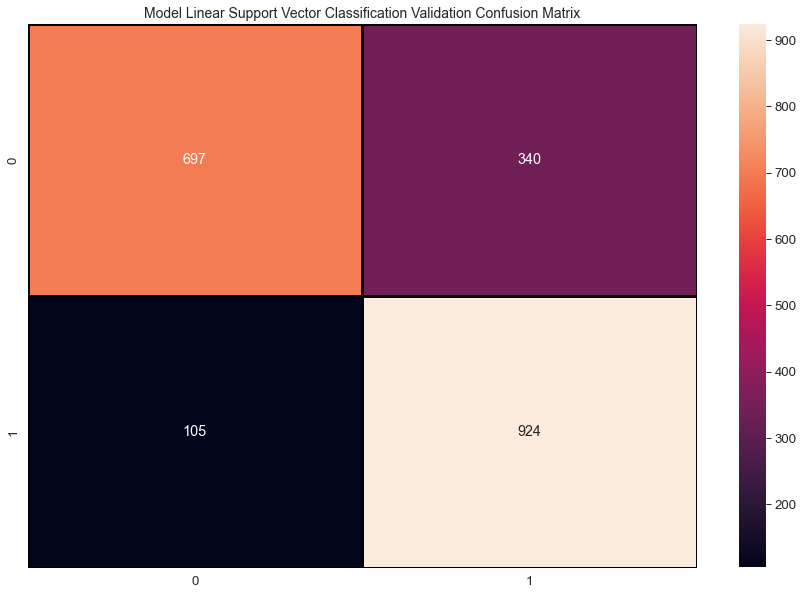

In [59]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

#### Multilayer Perceptron Classifier

Model Multilayer Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.852     0.725     0.783      1037
           1      0.759     0.873     0.812      1029

    accuracy                          0.799      2066
   macro avg      0.805     0.799     0.798      2066
weighted avg      0.806     0.799     0.798      2066



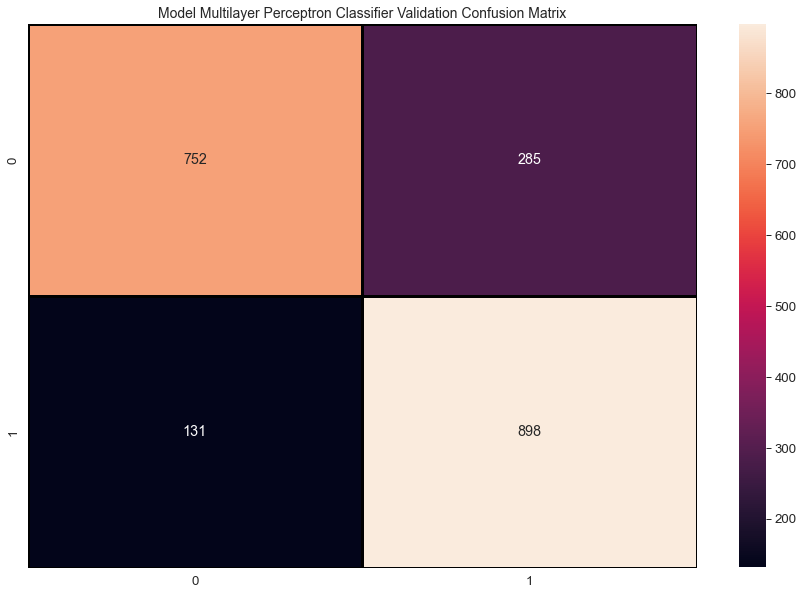

In [60]:
print('Model Multilayer Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, mlp_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, mlp_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Multilayer Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

## Evaluate the Models GPU

### Accuracy Score

# 15. Machine Learning Models Optimization

##  random grid for CPU Models

### Random Forest Classifier

In [61]:
# Features which make predictions of the model better
n_estimators = [int(x) for x in np.linspace(50, 500, num = 30)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 20)]
max_features = ['sqrt', 'log2', 'auto']
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
max_leaf_nodes.append(None)
min_impurity_decrease = [0.0, 0.2, 0.5, 0.75]

# Features which will make the model training easier
bootstrap = [True, False]
oob_score = [False, True]
n_jobs = [-1]
random_state = [None]
verbose = [0]
warm_start = [False]
class_weight = [None, 'balanced', 'balanced_subsample']
ccp_alpha = [0.0]
max_samples = [None]

# Create the random grid
random_grid_rf = {'n_estimators': n_estimators,
            'criterion': criterion,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features,
            'max_leaf_nodes' : max_leaf_nodes, 
            'min_impurity_decrease' : min_impurity_decrease,
            'bootstrap' : bootstrap,
            'oob_score' : oob_score,
            'n_jobs' : n_jobs, 
            'random_state' : random_state,
            'verbose' : verbose,
            'warm_start' : warm_start, 
            'class_weight' : class_weight,
            'ccp_alpha' : ccp_alpha,
            'max_samples' : max_samples
            }

### Gradient Boosting Classifier

In [62]:
loss = ['log_loss', 'deviance', 'exponential']
learning_rate = [0.0, 0.1, 0.2, 0.5, 0.75]
n_estimators = [int(x) for x in np.linspace(50, 500, num = 20)]
subsample = [1.0, 2.0, 4.0, 6.0, 8.0, 10.0]
criterion = ['friedman_mse', 'friedman_mse', 'squared_error', 'mse']
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
min_weight_fraction_leaf = [0.0, 0.1, 0.2, 0.5, 0.75]
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_impurity_decrease = [0.0, 0.1, 0.2, 0.5, 0.75]

init = [None]
random_state = [None]
max_features = ['sqrt', 'log2', 'auto']
verbose = [0]
max_leaf_nodes = [None]
warm_start = [False]
validation_fraction = [0.1]
n_iter_no_change = [None]
tol = [0.0001]
ccp_alpha = [0.0]

# Create the random grid
random_grid_gb = {'loss': loss,
            'learning_rate': learning_rate,
            'n_estimators': n_estimators,
            'subsample': subsample,
            'criterion': criterion,
            'min_samples_split': min_samples_split,
            'min_samples_leaf' : min_samples_leaf, 
            'min_weight_fraction_leaf' : min_weight_fraction_leaf,
            'max_depth' : max_depth,
            'min_impurity_decrease' : min_impurity_decrease,
            'init' : init, 
            'random_state' : random_state,
            'max_features' : max_features,
            'verbose' : verbose, 
            'max_leaf_nodes' : max_leaf_nodes,
            'warm_start' : warm_start,
            'validation_fraction' : validation_fraction,
            'n_iter_no_change' : n_iter_no_change, 
            'tol' : tol,
            'ccp_alpha' : ccp_alpha
            }

### Histogram-based Gradient Boosting Classification Tree

In [63]:
loss= ['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy']
learning_rate=[0.1] 
max_iter= [int(x) for x in np.linspace(50, 100, num = 10)] 
max_leaf_nodes=[int(x) for x in np.linspace(20, 60, num = 20)] 
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] 
min_samples_leaf=[int(x) for x in np.linspace(10, 40, num = 10)]
l2_regularization=[0.0, 0.1, 0.6]
max_bins=[int(x) for x in np.linspace(100, 255, num = 20)]

categorical_features=[None] 
monotonic_cst=[None] 
warm_start=[False]
early_stopping=['auto']
scoring=['loss'] 
validation_fraction=[0.1]
n_iter_no_change=[int(x) for x in np.linspace(10, 40, num = 10)]
tol=[1e-07] 
verbose=[0]
random_state=[None]

random_grid_hgb = {'loss' : loss,
                'learning_rate' : learning_rate,
                'max_iter' : max_iter,
                'max_leaf_nodes' : max_leaf_nodes,
                'max_depth' : max_depth,
                'min_samples_leaf' : min_samples_leaf,
                'l2_regularization' : l2_regularization,
                'max_bins' : max_bins,
                'categorical_features' : categorical_features,
                'monotonic_cst' : monotonic_cst,
                'warm_start' : warm_start,
                'early_stopping' : early_stopping,
                'scoring' : scoring,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change,
                'tol' : tol,
                'verbose' : verbose,
                'random_state' : random_state
                    }

### AdaBoost Classifier

In [64]:
base_estimator=[DecisionTreeClassifier(max_depth=1)] 
n_estimators= [int(x) for x in np.linspace(50, 500, num = 20)] 
learning_rate=[1.0] 
algorithm=['SAMME','SAMME.R'] 
random_state=[None] 

random_grid_ad = {'base_estimator' : base_estimator,
                'n_estimators' : n_estimators,
                'learning_rate' : learning_rate,
                'algorithm' : algorithm,
                'random_state' : random_state
}

### Extra Trees Classifier

In [65]:
n_estimators = [int(x) for x in np.linspace(100, 500, num = 20)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
min_weight_fraction_leaf = [0.0]
max_features = ['sqrt', 'log2', None]
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
#max_leaf_nodes.append(None)

min_impurity_decrease=[0.0]
bootstrap=[False] 
oob_score=[True,False] 
n_jobs=[None] 
random_state=[None] 
verbose=[0] 
warm_start=[False] 
class_weight=['balanced', 'balanced_subsample', None] 
ccp_alpha=[0.0] 
max_samples = [int(x) for x in np.linspace(1, 20, num = 10)] 
max_samples.append(None)

random_grid_et = {'n_estimators' : n_estimators,
                'criterion' : criterion,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features' : max_features,
                'max_leaf_nodes' : max_leaf_nodes,
                'min_impurity_decrease' : min_impurity_decrease,
                'bootstrap' : bootstrap,
                'oob_score' : oob_score,
                'n_jobs' : n_jobs,
                'random_state' : random_state,
                'verbose' : verbose,
                'warm_start': warm_start,
                'class_weight' : class_weight,
                'ccp_alpha' : ccp_alpha,
                'max_samples' : max_samples
}

### K Neighbors Classifier

In [66]:
n_neighbors = [int(x) for x in np.linspace(1, 10, num = 10)]
weights = ['uniform', 'distance'] 
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(10, 50, num = 10)]
p = [int(x) for x in np.linspace(1, 10, num = 10)]
metric = ['minkowski'] 
metric_params=[None] 
n_jobs=[None]

random_grid_knn = {'n_neighbors' : n_neighbors,
                'weights' : weights,
                'algorithm' : algorithm,
                'leaf_size' : leaf_size,
                'p' : p,
                'metric' : metric,
                'metric_params' : metric_params,
                'n_jobs' : n_jobs
}

### Decision Tree Classifier

In [67]:
criterion = ['gini','entropy', 'log_loss'] 
splitter = ['best', 'random'] 
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] 
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] 
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] 
min_weight_fraction_leaf = [0.0] 
max_features = [None, 'auto', 'log2'] 
random_state = [None] 
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
max_leaf_nodes.append(None)

min_impurity_decrease=[0.0] 
class_weight=[None] 
ccp_alpha=[0.0] 

random_grid_dt = {'criterion' : criterion,
                'splitter' : splitter,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features' : max_features,
                'random_state' : random_state,
                'max_leaf_nodes' : max_leaf_nodes, 
                'min_impurity_decrease' : min_impurity_decrease,
                'class_weight' : class_weight,
                'ccp_alpha' : ccp_alpha                
}

### Logistic Regression Classifiers

In [68]:
penalty = ['l2','l1', '‘elasticnet'] 
dual = [False, True]
tol = [0.0001] 
C = [1.0] 
fit_intercept = [True, False]
intercept_scaling = [1]
class_weight = [None, 'balanced']
random_state = [None] 
solver = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'] 
max_iter = [int(x) for x in np.linspace(50, 250, num = 10)]  
multi_class = ['auto', 'ovr', 'multinomial'] 
verbose = [0] 
warm_start = [False] 
n_jobs = [None] 
l1_ratio = [None]

random_grid_lg = {'penalty' : penalty,
                'dual' : dual,
                'tol' : tol,
                'C' : C,
                'fit_intercept' : fit_intercept,
                'intercept_scaling' : intercept_scaling,
                'class_weight' : class_weight,
                'random_state' : random_state,
                'solver' : solver,
                'max_iter' : max_iter,
                'multi_class' : multi_class,
                'verbose' : verbose,
                'warm_start' : warm_start,
                'n_jobs' : n_jobs,
                'l1_ratio' : l1_ratio
}

### Logistic Regression CV Classifier

In [69]:
Cs = [int(x) for x in np.linspace(5, 50, num = 10)] 
fit_intercept = [True, False] 
cv = [int(x) for x in np.linspace(3, 7, num = 5)] 
dual = [False, False]
penalty = ['l2', 'l1', 'elasticnet'] 
scoring = [None] 
solver=['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
tol = [0.0001] 
max_iter = [100] 
class_weight = [None, 'balanced'] 
n_jobs = [None] 
verbose = [0] 
refit = [True] 
intercept_scaling = [1.0] 
multi_class = ['auto', 'ovr', 'multinomial'] 
random_state = [None]
l1_ratios = [None]

random_grid_lgcv = {'Cs' : Cs,
                'fit_intercept' : fit_intercept,
                'cv' : cv,
                'dual' : dual,
                'penalty' : penalty,
                'scoring' : scoring,
                'solver' : solver,
                'tol' : tol,
                'max_iter' : max_iter,
                'class_weight' : class_weight,
                'n_jobs' : n_jobs,
                'verbose' : verbose,
                'refit' : refit,
                'intercept_scaling' : intercept_scaling,
                'multi_class' : multi_class,
                'random_state' : random_state,
                'l1_ratios' : l1_ratios
}

### Stochastic Gradient Descent Classifier

In [70]:
loss=['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty=['l2', 'l1', 'elasticnet'] 
alpha=[0.0001]
l1_ratio=[0.15] 
fit_intercept=[True, False] 
max_iter = [int(x) for x in np.linspace(900, 5000, num = 15)]
tol=[0.001]
shuffle=[True, False] 
verbose=[0] 
epsilon=[0.1] 
n_jobs=[None] 
random_state=[None] 
learning_rate=['optimal'] 
eta0 = [0.0] 
power_t = [0.5] 
early_stopping=[False, True]
validation_fraction=[0.1]
n_iter_no_change = [int(x) for x in np.linspace(3, 25, num = 15)] 
class_weight=[None, 'balanced'] 
warm_start=[False]
average=[False]

random_grid_sgdc = {'loss' : loss,
                'penalty' : penalty, 
                'alpha' : alpha, 
                'l1_ratio' : l1_ratio,
                'fit_intercept' : fit_intercept,
                'max_iter' : max_iter,
                'tol' : tol, 
                'shuffle' : shuffle, 
                'verbose' : verbose,
                'epsilon' : epsilon, 
                'n_jobs' : n_jobs, 
                'random_state' : random_state, 
                'learning_rate' : learning_rate, 
                'eta0' : eta0,
                'power_t' : power_t, 
                'early_stopping' : early_stopping,
                'validation_fraction' : validation_fraction, 
                'n_iter_no_change' : n_iter_no_change,
                'class_weight' : class_weight,
                'warm_start' : warm_start,
                'average' : average
}

### Linear Perceptron Classifier

In [71]:
penalty = [None, 'l2', 'l1'] 
alpha = [0.0001] 
l1_ratio = [0.15] 
fit_intercept=[True, False]
max_iter = [int(x) for x in np.linspace(900, 5000, num = 15)]
tol=[0.001] 
shuffle=[True] 
verbose=[0] 
eta0=[1.0] 
n_jobs=[None] 
random_state=[0] 
early_stopping=[False] 
validation_fraction=[0.1] 
n_iter_no_change=[5]
class_weight=[None] 
warm_start=[False]

random_grid_lpc = {'penalty' : penalty,
                'alpha' : alpha,
                'l1_ratio' : l1_ratio,
                'fit_intercept' : fit_intercept,
                'max_iter' : max_iter,
                'tol' : tol,
                'shuffle' : shuffle,
                'verbose' : verbose,
                'eta0' : eta0,
                'n_jobs' : n_jobs,
                'random_state' : random_state,
                'early_stopping' : early_stopping,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change,
                'class_weight' : class_weight,
                'warm_start' : warm_start,
}

### Support Vector Machines Classifiers

In [72]:
C=[1.0]
kernel=['rbf', 'linear', 'poly', 'sigmoid']
degree = [int(x) for x in np.linspace(1, 15, num = 10)] 
gamma = ['scale', 'auto']
coef0=[0.0] 
shrinking=[True, False] 
probability=[False, True] 
tol=[0.001]
cache_size=[int(x) for x in np.linspace(750, 600, num = 20)]
class_weight=[None, 'balanced'] 
verbose=[False] 
max_iter=  [int(x) for x in np.linspace(-5, 5, num = 8)] 
decision_function_shape=['ovr', 'ovo'] 
break_ties=[False] 
random_state=[None]

random_grid_svm = {'C' : C,
                'kernel' : kernel,
                'degree' : degree,
                'gamma' : gamma,
                'coef0' : coef0,
                'shrinking' : shrinking,
                'probability' : probability,
                'tol' : tol,
                'cache_size' : cache_size,
                'class_weight': class_weight,
                'verbose' : verbose,
                'max_iter' : max_iter,
                'decision_function_shape' : decision_function_shape,
                'break_ties' : break_ties,
                'random_state' : random_state
}

### Linear Support Vector Classification

In [73]:
penalty = ['l2', 'l1']
loss = ['squared_hinge', 'hinge']
dual=[True, False]
tol=[0.0001]
C=[1.0] 
multi_class=['ovr', 'crammer_singer'] 
fit_intercept=[True, False] 
intercept_scaling = [int(x) for x in np.linspace(1, 10, num = 10)] 
class_weight=[None] 
verbose=[0]
random_state=[None]
max_iter=[int(x) for x in np.linspace(600, 8000, num = 30)]

random_grid_lsvm = {'penalty' : penalty,
                'loss' : loss, 
                'dual' : dual,
                'tol' : tol,
                'C' : C,
                'multi_class' : multi_class,
                'fit_intercept' : fit_intercept,
                'intercept_scaling' : intercept_scaling,
                'class_weight' : class_weight,
                'verbose' : verbose,
                'random_state' : random_state,
                'max_iter' : max_iter
}

## Hyperparameters using CPU

In [74]:
'''
        Random Forest Classifier
'''

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, random_grid_rf, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)
print("Random Forest Classifier")

Random Forest Classifier


In [75]:
'''
        Gradient Boosting Classifier
'''

gb = GradientBoostingClassifier()

gb_random = RandomizedSearchCV(gb, random_grid_gb, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
gb_random.fit(X_train, y_train)
print("Gradient Boosting Classifier")

Gradient Boosting Classifier


In [76]:
'''
        Histogram-based Gradient Boosting Classification Tree
'''

hgb = HistGradientBoostingClassifier()

hgb_random = RandomizedSearchCV(hgb, random_grid_hgb, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
hgb_random.fit(X_train, y_train)
print("Histogram-based Gradient Boosting Classification Tree")

Histogram-based Gradient Boosting Classification Tree


In [77]:
'''
        AdaBoost Classifier
'''

ad = AdaBoostClassifier()

ad_random = RandomizedSearchCV(ad, random_grid_ad, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
ad_random.fit(X_train, y_train)
print('AdaBoost Classifier')

AdaBoost Classifier


In [78]:
'''   
        Extra Trees Classifier
'''

et = ExtraTreesClassifier()

et_random = RandomizedSearchCV(et, random_grid_et, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
et_random.fit(X_train, y_train)
print('Extra Trees Classifier')

Extra Trees Classifier


In [79]:
'''   
        K Neighbors Classifier
'''

knn = KNeighborsClassifier()

knn_random = RandomizedSearchCV(knn, random_grid_knn, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
knn_random.fit(X_train, y_train)
print('K Neighbors Classifier')

K Neighbors Classifier


In [80]:
'''
            Decision Tree Classifier
'''

dt = DecisionTreeClassifier()

dt_random = RandomizedSearchCV(dt, random_grid_dt, n_iter=300, cv = 3, n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train, y_train)
print('Decision Tree Classifier')

Decision Tree Classifier


In [81]:
'''
            Logistic Regression Classifiers
'''

lg = LogisticRegression()

lg_random = RandomizedSearchCV(lg, random_grid_lg, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lg_random.fit(X_train, y_train)
print('Logistic Regression Classifiers')

Logistic Regression Classifiers


In [82]:
'''
            Logistic Regression CV Classifier
'''

lgcv = LogisticRegressionCV()

lgcv_random = RandomizedSearchCV(lgcv, random_grid_lgcv, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lgcv_random.fit(X_train, y_train)
print('Logistic Regression CV Classifier')

Logistic Regression CV Classifier


In [83]:
'''
            Stochastic Gradient Descent Classifier
'''

sgdc = SGDClassifier()

sgdc_random = RandomizedSearchCV(sgdc, random_grid_sgdc, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
sgdc_random.fit(X_train, y_train)
print('Stochastic Gradient Descent Classifier')

Stochastic Gradient Descent Classifier


In [84]:
'''
            Linear Perceptron Classifier
'''

lpc = Perceptron()

lpc_random = RandomizedSearchCV(lpc, random_grid_lpc, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lpc_random.fit(X_train, y_train)
print('Linear Perceptron Classifier')

Linear Perceptron Classifier


In [85]:
'''
            Support Vector Machines Classifiers
'''

svm = SVC()

svm_random = RandomizedSearchCV(svm, random_grid_svm, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
svm_random.fit(X_train, y_train)
print('Support Vector Machines Classifiers')

Support Vector Machines Classifiers


In [86]:
'''
            Linear Support Vector Classification
'''

lsvm = LinearSVC()

lsvm_random = RandomizedSearchCV(lsvm, random_grid_lsvm, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lsvm_random.fit(X_train, y_train)
print('Linear Support Vector Classification')

Linear Support Vector Classification


## Build the Optmization Models Using CPU

In [87]:
# Random Forest Classifier
rf_op_m_1_cpu = rf_random.best_estimator_

print('Parameters currently in use:\n')
print(rf_op_m_1_cpu.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 84, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 37, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 251, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [88]:
# Gradient Boosting Classifier
gb_op_m_1_cpu = gb_random.best_estimator_

print('Parameters currently in use:\n')
print(gb_op_m_1_cpu.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.75, 'loss': 'log_loss', 'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 121, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [89]:
# Histogram-based Gradient Boosting Classification Tree
hgb_op_m_1_cpu = hgb_random.best_estimator_

print('Parameters currently in use:\n')
print(hgb_op_m_1_cpu.get_params())

Parameters currently in use:

{'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.0, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_bins': 108, 'max_depth': 37, 'max_iter': 100, 'max_leaf_nodes': 60, 'min_samples_leaf': 36, 'monotonic_cst': None, 'n_iter_no_change': 10, 'random_state': None, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [90]:
# AdaBoost Classifier
ad_op_m_1_cpu = ad_random.best_estimator_

print('Parameters currently in use:\n')
print(ad_op_m_1_cpu.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 381, 'random_state': None}


In [91]:
# Extra Trees Classifier
et_op_m_1_cpu = et_random.best_estimator_

print('Parameters currently in use:\n')
print(et_op_m_1_cpu.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_depth': 16, 'max_features': 'log2', 'max_leaf_nodes': 9, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 9, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 310, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [92]:
# K Neighbors Classifier
knn_op_m_1_cpu = knn_random.best_estimator_

print('Parameters currently in use:\n')
print(knn_op_m_1_cpu.get_params())

Parameters currently in use:

{'algorithm': 'brute', 'leaf_size': 45, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}


In [93]:
# Decision Tree Classifier
dt_op_m_1_cpu = dt_random.best_estimator_

print('Parameters currently in use:\n')
print(dt_op_m_1_cpu.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 9, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [94]:
# Logistic Regression Classifiers
lg_op_m_1_cpu = lg_random.best_estimator_

print('Parameters currently in use:\n')
print(lg_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 116, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [95]:
# Logistic Regression CV Classifier
lgcv_op_m_1_cpu = lgcv_random.best_estimator_

print('Parameters currently in use:\n')
print(lgcv_op_m_1_cpu.get_params())

Parameters currently in use:

{'Cs': 25, 'class_weight': None, 'cv': 5, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0}


In [96]:
# Stochastic Gradient Descent Classifier
sgdc_op_m_1_cpu = sgdc_random.best_estimator_

print('Parameters currently in use:\n')
print(sgdc_op_m_1_cpu.get_params())

Parameters currently in use:

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 2657, 'n_iter_no_change': 18, 'n_jobs': None, 'penalty': 'l1', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [97]:
# Linear Perceptron Classifier
lpc_op_m_1_cpu = lpc_random.best_estimator_

print('Parameters currently in use:\n')
print(lpc_op_m_1_cpu.get_params())

Parameters currently in use:

{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': False, 'l1_ratio': 0.15, 'max_iter': 900, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l1', 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [98]:
# Support Vector Machines Classifiers
svm_op_m_1_cpu = svm_random.best_estimator_

print('Parameters currently in use:\n')
print(svm_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'break_ties': False, 'cache_size': 639, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 13, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 5, 'probability': False, 'random_state': None, 'shrinking': False, 'tol': 0.001, 'verbose': False}


In [99]:
# Linear Support Vector Classification
lsvm_op_m_1_cpu = lsvm_random.best_estimator_

print('Parameters currently in use:\n')
print(lsvm_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 6724, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


## Predict y_test Using CPU

In [100]:
# Random Forest Classifier
rf_op_m_1_pred_vaild_cpu = rf_op_m_1_cpu.predict(X_test)    

In [101]:
# Gradient Boosting Classifier
gb_op_m_1_pred_vaild_cpu = gb_op_m_1_cpu.predict(X_test)

In [102]:
# Histogram-based Gradient Boosting Classification Tree
hgb_op_m_1_pred_vaild_cpu = hgb_op_m_1_cpu.predict(X_test)

In [103]:
# AdaBoost Classifier
ad_op_m_1_pred_vaild_cpu = ad_op_m_1_cpu.predict(X_test)

In [104]:
# Extra Trees Classifier
et_op_m_1_pred_vaild_cpu = et_op_m_1_cpu.predict(X_test)

In [105]:
# K Neighbors Classifier
knn_op_m_1_pred_vaild_cpu = knn_op_m_1_cpu.predict(X_test)

In [106]:
# Decision Tree Classifier
dt_op_m_1_pred_vaild_cpu = dt_op_m_1_cpu.predict(X_test)

In [107]:
# Logistic Regression Classifier
lg_op_m_1_pred_vaild_cpu = lg_op_m_1_cpu.predict(X_test)    

In [108]:
# Logistic Regression CV Classifier
lgcv_op_m_1_pred_vaild_cpu =  lgcv_op_m_1_cpu.predict(X_test)    

In [109]:
# Stochastic Gradient Descent Classifier
sgdc_op_m_1_pred_vaild_cpu =  sgdc_op_m_1_cpu.predict(X_test)

In [110]:
# Linear Perceptron Classifier
lpc_op_m_1_pred_vaild_cpu =  lpc_op_m_1_cpu.predict(X_test)

In [111]:
# Support Vector Machines Classifiers
svm_op_m_1_pred_vaild_cpu = svm_op_m_1_cpu.predict(X_test)    

In [112]:
# Linear Support Vector Classification
lsvm_op_m_1_pred_vaild_cpu = lsvm_op_m_1_cpu.predict(X_test)

## Evaluate the Models CPU

### Accuracy Score

In [113]:
# Random Forest Classifier
Valid_accuracy_rf_op_m_1_cpu = accuracy_score(y_test, rf_op_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_op_m_1_cpu = accuracy_score(y_test, gb_op_m_1_pred_vaild_cpu)

# Histogram-based Gradient Boosting Classification Tree
Valid_accuracy_hgb_op_m_1_cpu = accuracy_score(y_test, hgb_op_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_op_m_1_cpu = accuracy_score(y_test, ad_op_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_op_m_1_cpu = accuracy_score(y_test, et_op_m_1_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_op_m_1_cpu = accuracy_score(y_test, knn_op_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_op_m_1_cpu = accuracy_score(y_test, dt_op_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_op_m_1_cpu = accuracy_score(y_test, lg_op_m_1_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_op_m_1_cpu = accuracy_score(y_test, lgcv_op_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_op_m_1_cpu = accuracy_score(y_test, sgdc_op_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_op_m_1_cpu = accuracy_score(y_test, lpc_op_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_op_m_1_cpu = accuracy_score(y_test, svm_op_m_1_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_op_m_1_cpu = accuracy_score(y_test, lsvm_op_m_1_pred_vaild_cpu)

cpu_ml_op_m_1_valid_compare = pd.DataFrame({"Optimization CPU Models": [
                                "Random Forest Classifier", 
                                "Gradient Boosting Classifier",
                                "Histogram-based Gradient Boosting Classification Tree",
                                "AdaBoost Classifier",
                                "Extra Trees Classifier",
                                "K Neighbors Classifier",
                                "Decision Tree Classifier",
                                "Logistic Regression Classifier",
                                "Logistic Regression CV Classifier",
                                "Stochastic Gradient Descent Classifier",
                                "Linear Perceptron Classifier",
                                "Support Vector Machines Classifiers",
                                "Linear Support Vector Classification",
                                ],

                "Optimization CPU Models Accuracy": [
                                Valid_accuracy_rf_op_m_1_cpu, 
                                Valid_accuracy_gb_op_m_1_cpu,
                                Valid_accuracy_hgb_op_m_1_cpu,
                                Valid_accuracy_ad_op_m_1_cpu,
                                Valid_accuracy_et_op_m_1_cpu,
                                Valid_accuracy_knn_op_m_1_cpu,
                                Valid_accuracy_dt_op_m_1_cpu,
                                Valid_accuracy_lg_op_m_1_cpu,
                                Valid_accuracy_lgcv_op_m_1_cpu,
                                Valid_accuracy_sgdc_op_m_1_cpu,
                                Valid_accuracy_lpc_op_m_1_cpu,
                                Valid_accuracy_svm_op_m_1_cpu,
                                Valid_accuracy_lsvm_op_m_1_cpu,
                                ],
                        })        
print(tabulate(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=True), x = "Optimization CPU Models Accuracy", y = "Optimization CPU Models", title = "Model Machines Learning Optimization Validation Accuracy")
fig.show()

+----+-------------------------------------------------------+------------------------------------+
|    | Optimization CPU Models                               |   Optimization CPU Models Accuracy |
|----+-------------------------------------------------------+------------------------------------|
|  2 | Histogram-based Gradient Boosting Classification Tree |                           0.832043 |
|  1 | Gradient Boosting Classifier                          |                           0.82333  |
|  5 | K Neighbors Classifier                                |                           0.815102 |
|  3 | AdaBoost Classifier                                   |                           0.814134 |
|  0 | Random Forest Classifier                              |                           0.799613 |
|  9 | Stochastic Gradient Descent Classifier                |                           0.791868 |
|  7 | Logistic Regression Classifier                        |                           0.7909   |


### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.838     0.744     0.789      1037
           1      0.769     0.855     0.810      1029

    accuracy                          0.800      2066
   macro avg      0.803     0.800     0.799      2066
weighted avg      0.804     0.800     0.799      2066



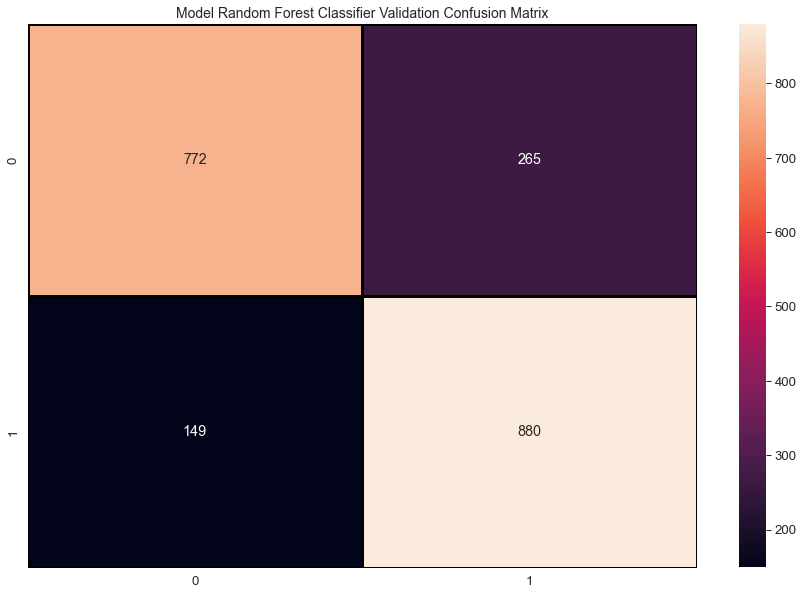

In [114]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.827     0.820     0.823      1037
           1      0.820     0.827     0.823      1029

    accuracy                          0.823      2066
   macro avg      0.823     0.823     0.823      2066
weighted avg      0.823     0.823     0.823      2066



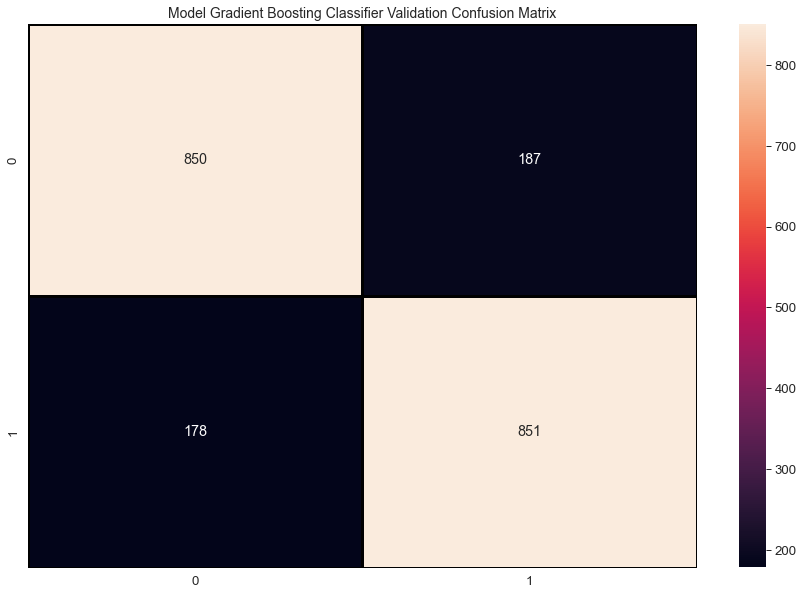

In [115]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Histogram-based Gradient Boosting Classification Tree

Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:
                precision    recall  f1-score   support

           0      0.854     0.802     0.827      1037
           1      0.812     0.862     0.836      1029

    accuracy                          0.832      2066
   macro avg      0.833     0.832     0.832      2066
weighted avg      0.833     0.832     0.832      2066



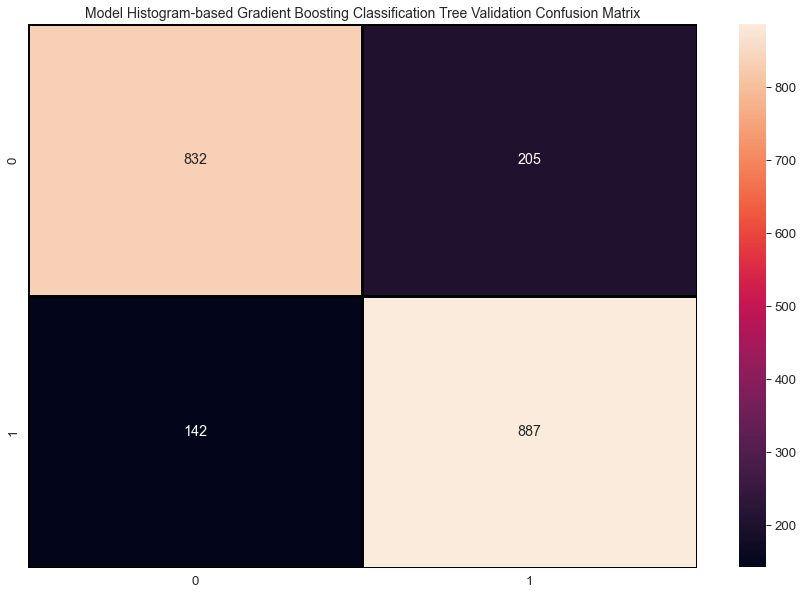

In [116]:
print('Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:\n ', classification_report(y_test, hgb_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, hgb_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Histogram-based Gradient Boosting Classification Tree Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.835     0.760     0.796      1037
           1      0.778     0.848     0.812      1029

    accuracy                          0.804      2066
   macro avg      0.806     0.804     0.804      2066
weighted avg      0.807     0.804     0.804      2066



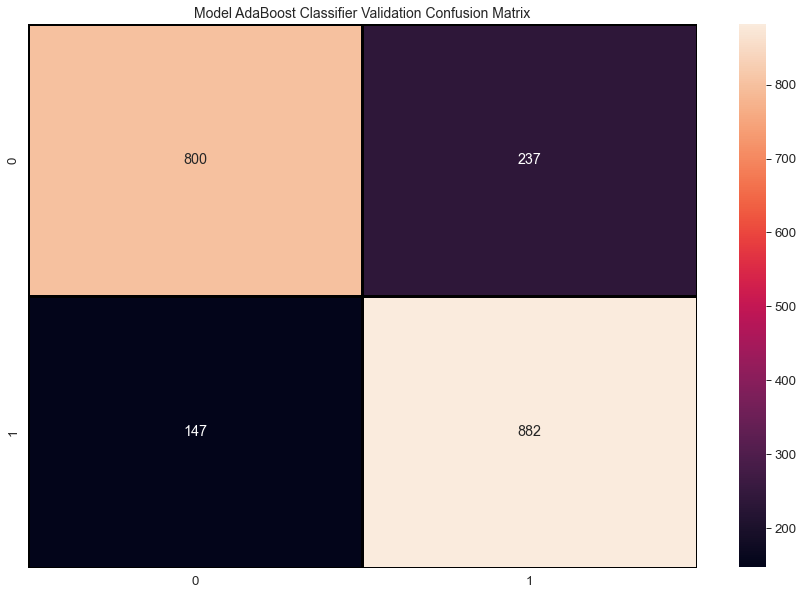

In [117]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.827     0.725     0.773      1037
           1      0.754     0.847     0.798      1029

    accuracy                          0.786      2066
   macro avg      0.790     0.786     0.785      2066
weighted avg      0.791     0.786     0.785      2066



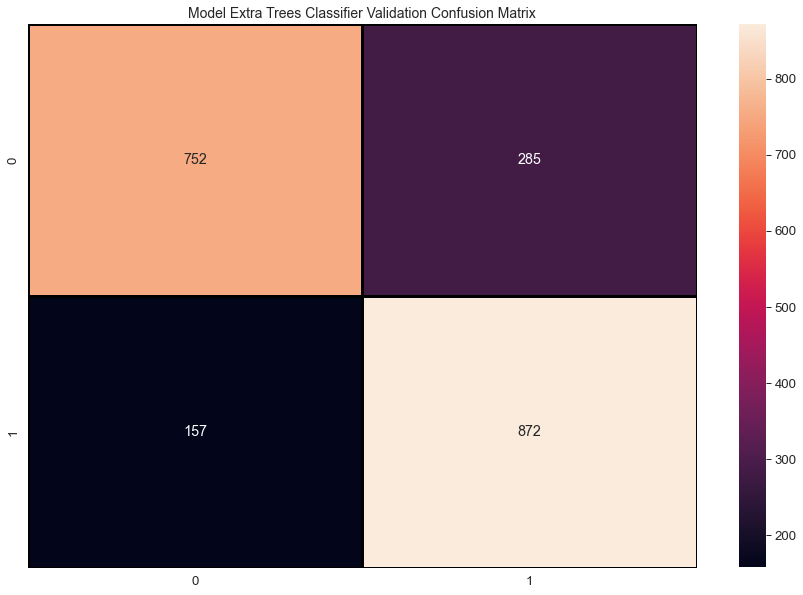

In [118]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.874     0.738     0.800      1037
           1      0.772     0.893     0.828      1029

    accuracy                          0.815      2066
   macro avg      0.823     0.815     0.814      2066
weighted avg      0.823     0.815     0.814      2066



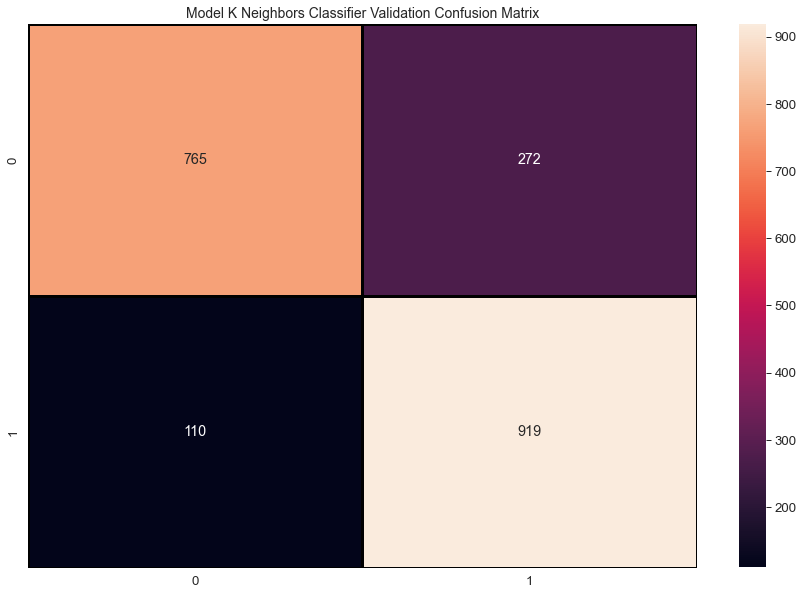

In [119]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.809     0.758     0.783      1037
           1      0.771     0.820     0.795      1029

    accuracy                          0.789      2066
   macro avg      0.790     0.789     0.789      2066
weighted avg      0.790     0.789     0.789      2066



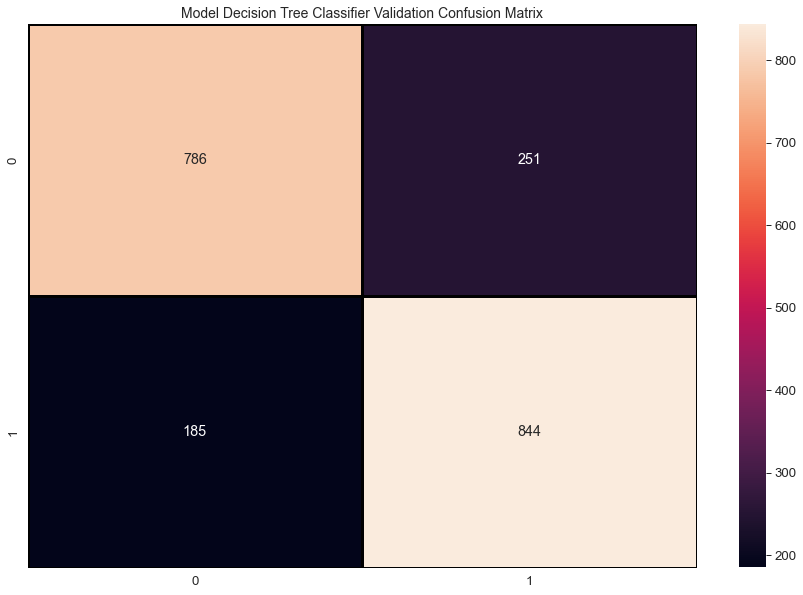

In [120]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.816     0.753     0.783      1037
           1      0.769     0.829     0.798      1029

    accuracy                          0.791      2066
   macro avg      0.793     0.791     0.791      2066
weighted avg      0.793     0.791     0.791      2066



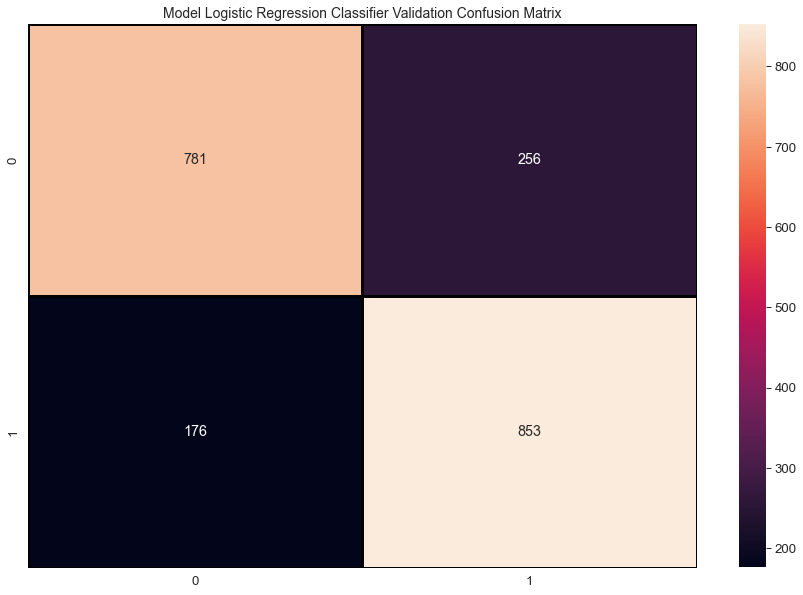

In [121]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.816     0.752     0.783      1037
           1      0.768     0.829     0.798      1029

    accuracy                          0.790      2066
   macro avg      0.792     0.791     0.790      2066
weighted avg      0.792     0.790     0.790      2066



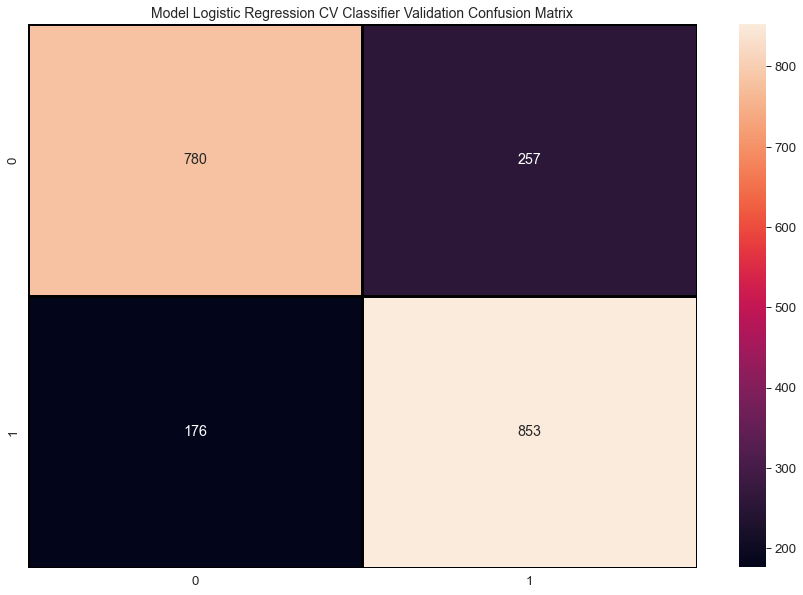

In [122]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.827     0.741     0.781      1037
           1      0.763     0.844     0.801      1029

    accuracy                          0.792      2066
   macro avg      0.795     0.792     0.791      2066
weighted avg      0.795     0.792     0.791      2066



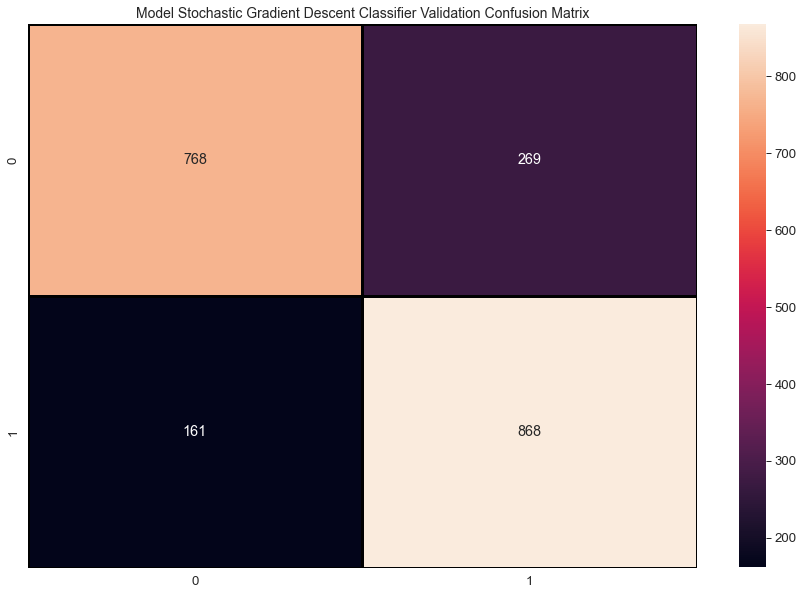

In [123]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.708     0.831     0.765      1037
           1      0.794     0.655     0.718      1029

    accuracy                          0.743      2066
   macro avg      0.751     0.743     0.741      2066
weighted avg      0.751     0.743     0.741      2066



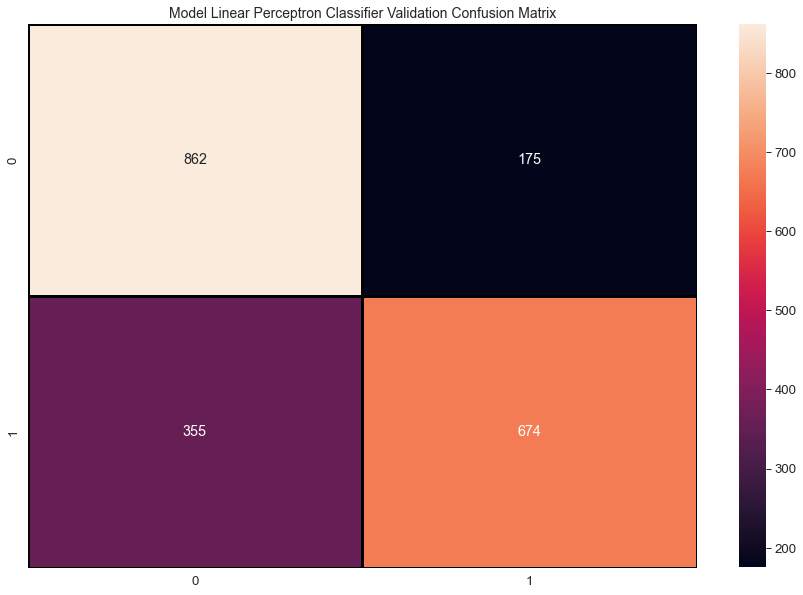

In [124]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.605     0.804     0.690      1037
           1      0.705     0.470     0.564      1029

    accuracy                          0.638      2066
   macro avg      0.655     0.637     0.627      2066
weighted avg      0.654     0.638     0.627      2066



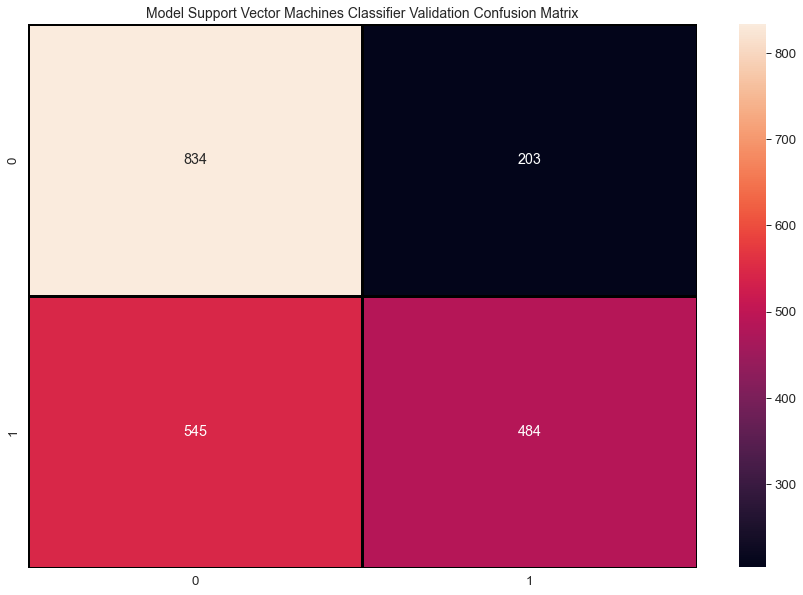

In [125]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      0.866     0.651     0.743      1037
           1      0.719     0.899     0.799      1029

    accuracy                          0.774      2066
   macro avg      0.793     0.775     0.771      2066
weighted avg      0.793     0.774     0.771      2066



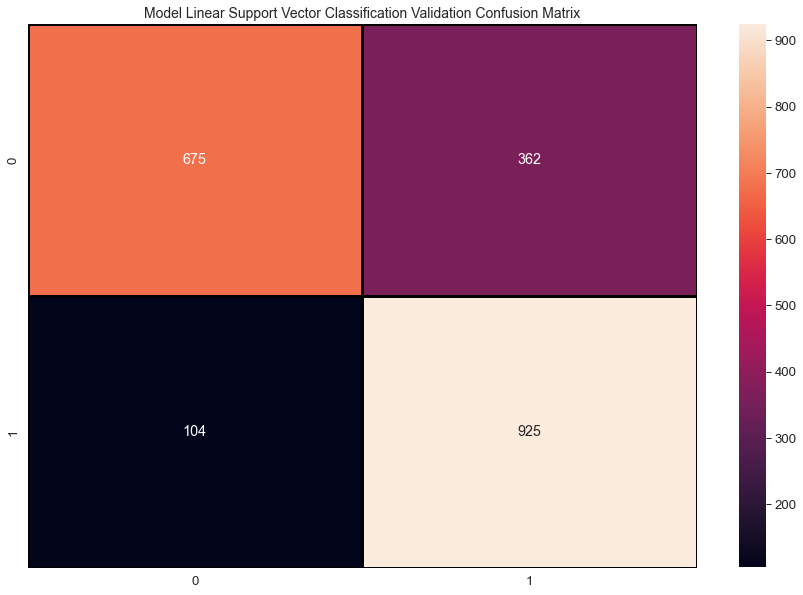

In [126]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

# Accuracy Score Summary  

## Standered Machien Learning Models 

### Predication Using CPU

In [127]:
print(tabulate(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending= False ), headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+---------------------------------+
|    | Standered CPU Models                                  |   Standered CPU Models Accuracy |
|----+-------------------------------------------------------+---------------------------------|
|  4 | Extra Trees Classifier                                |                        0.845111 |
|  0 | Random Forest Classifier                              |                        0.844143 |
| 13 | XGBoost Classifiers                                   |                        0.831559 |
|  2 | Histogram-based Gradient Boosting Classification Tree |                        0.821394 |
|  1 | Gradient Boosting Classifier                          |                        0.809293 |
|  5 | K Neighbors Classifier                                |                        0.805905 |
|  3 | AdaBoost Classifier                                   |                        0.803969 |
| 16 | Multilayer Perceptron C

In [128]:
fig = px.bar(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending= True ), x = "Standered CPU Models Accuracy", y = "Standered CPU Models", title = "Model Machines Learning CPU Validation Accuracy")
fig.show()

The results for the Standered Machine Learning it is showing Extra Trees Classifier, Random Forest Classifier, XGBoost Classifiers with accuracy (84.5, 84.4, 83.1) respectively.

## Machine Learning Optmization Models

### Predication Using CPU

In [129]:
print(tabulate(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+------------------------------------+
|    | Optimization CPU Models                               |   Optimization CPU Models Accuracy |
|----+-------------------------------------------------------+------------------------------------|
|  2 | Histogram-based Gradient Boosting Classification Tree |                           0.832043 |
|  1 | Gradient Boosting Classifier                          |                           0.82333  |
|  5 | K Neighbors Classifier                                |                           0.815102 |
|  3 | AdaBoost Classifier                                   |                           0.814134 |
|  0 | Random Forest Classifier                              |                           0.799613 |
|  9 | Stochastic Gradient Descent Classifier                |                           0.791868 |
|  7 | Logistic Regression Classifier                        |                           0.7909   |


In [130]:
fig = px.bar(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending= True ), x = "Optimization CPU Models Accuracy", y = "Optimization CPU Models", title = "Model Machines Learning Optimization CPU Validation Accuracy")
fig.show()

The results for the Optimization Machine Learning it is showing Histogram-based Gradient Boosting Classification Tree, Gradient Boosting Classifier, K Neighbors Classifier with accuracy (83.2, 82.3, 81.5) respectively.

## Compare the Machine Learning Models Accuracy 

In [132]:
cpu_ml_m_1_valid_compare = pd.DataFrame(cpu_ml_m_1_valid_compare) 

cpu_ml_op_m_1_valid_compare = pd.DataFrame(cpu_ml_op_m_1_valid_compare) 

All_ML_Accuracy_result = pd.concat([cpu_ml_m_1_valid_compare.set_index('Standered CPU Models'),
                                     cpu_ml_op_m_1_valid_compare.set_index('Optimization CPU Models')], axis=1)

All_ML_Accuracy_result = All_ML_Accuracy_result.sort_values(by="Standered CPU Models Accuracy", ascending=False)
pd.DataFrame(All_ML_Accuracy_result)

,Standered CPU Models Accuracy,Optimization CPU Models Accuracy
Extra Trees Classifier,0.845,0.786
Random Forest Classifier,0.844,0.800
XGBoost Classifiers,0.832,NaN
Histogram-based Gradient Boosting Classification Tree,0.821,0.832
Gradient Boosting Classifier,0.809,0.823
K Neighbors Classifier,0.806,0.815
AdaBoost Classifier,0.804,0.814
Multilayer Perceptron Classifier,0.799,NaN
Decision Tree Classifier,0.796,0.789
Logistic Regression CV Classifier,0.791,0.790


As it can be seen above, the performance of some of the models have in fact reduced even after going through the process of optimization. This is because the hyperparameters have been experimented with only 150 interations. This iteration number is chosen at random, instead of the default number of optimization. Although performance or accuracy of the models could have been further improved than the original accuracies of the models, the computation power and time required to carry out the entire learning process is more than ideal. Since the highest accuracy achieved is 83.2%, this has been deemed sufficient for the purpose of this project and not further experimentation have been performed in attempts to achieve high accuracy.

Accuracy Standered CPU Models vs Accuracy Optimization CPU Models. as it is showing 'Histogram-based Gradient Boosting Classification Tree', 'Gradient Boosting Classifier', 'K Neighbors Classifier', 'AdaBoost Classifier', 'Stochastic Gradient Descent Classifier', 'Linear Perceptron Classifier' the accuracy increased between 1% and 11%.